In [1]:
#Initialisation
import h5py
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import re


# 06 Oct Data Processing

The minimum values and maximum values for the raw data were obtained from the 4'th row of the energy image, as on this row we notice the maximum amount of variation from the images if the sensors were working.
The output of the below block is an array called var where the sensor number, minimum value of the row and maximum value of the row, and the difference between the minimum and maximum values are stored.

In [4]:
#location of sound file on local system
location = 'C:\\Users\\Danita\\Desktop\\sensorCityData\\06Oct\\2016-10-24'
#create an empty array to store the min and max values for each sensor
var = np.array([]).reshape(0,4)

#iterate throught the files in the location mentioned to get the energy data and calculate the min and max values in row 4
for filename in os.listdir(location):
#    print filename
    fullPath = os.path.join(location, filename)
    soundData = h5py.File(fullPath , 'r')
    energyVal = soundData.get('energy') 
    energyArray= np.array(energyVal)
    avg=0
    count=0
    for val in range(4,5):
        minVal = np.amin(energyArray[val])
        maxVal = np.amax(energyArray[val])
        diff = maxVal - minVal


#obtain the sensor number from the filename that is stored in the local system- this needs to be changed depending on the filenames themselves
#in your local directory to replicate this program
    filename= filename[6:-32]

    var = np.vstack((var, [filename,minVal , maxVal, diff ]))
    



# 04 Oct Data Processing

The same was done for the data obtained from 04 Oct

In [5]:
location = 'C:\\Users\\Danita\\Desktop\\sensorCityData\\04Oct\\GIT_cc14a7a227c856aee6e0b541b97a77aabb8d3307-2016-10-21-17-13\\ptne\\hdf5\\2016-10-21'
var1=np.array([]).reshape(0,4)

for filename in os.listdir(location):

    fullPath = os.path.join(location, filename)
    soundData = h5py.File(fullPath , 'r')
    energyVal = soundData.get('energy') 
    energyArray= np.array(energyVal)
    avg=0
    count=0
    for val in range(4,5):
        minVal1 = np.amin(energyArray[val])
        maxVal1 = np.amax(energyArray[val])
        diff1 = maxVal1 - minVal1


        
    filename= filename[9:-32]
    var1 = np.vstack((var1, [filename,minVal1 , maxVal1, diff1 ]))




The data was stored to the system as Difference.h5 if we need to access the data later or the data was required for other parts of this assignment. 

In [6]:
#write the two datasets to the file
with h5py.File('Difference.h5', 'w') as hf:
    hf.create_dataset('04Oct', data=var1)    
    hf.create_dataset('06Oct', data=var)
#get a list of keys to conform that tht data was stores
with h5py.File('Difference.h5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())

('List of arrays in this file: \n', [u'04Oct', u'06Oct'])


In [7]:
#more initiliasition for next following blocks
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
from mpl_toolkits.mplot3d import Axes3D



# 04 Oct Data Processing

From the file we read the data for 04 Oct and plot the minimum and maximum values as a scatter plot


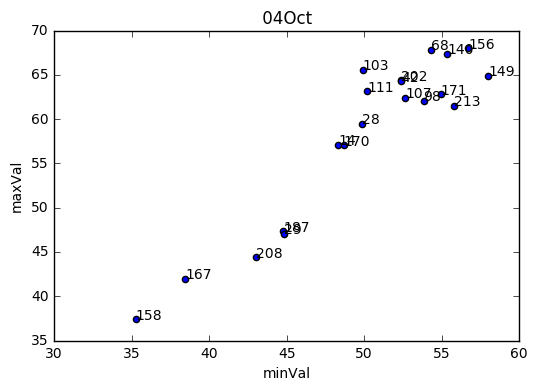

In [11]:
#open the file Difference.h5 and use min values as x values
# max values as y and the sensor numbers for labels
with h5py.File('Difference.h5','r') as hf:
    data4Oct= hf.get('04Oct')
    xs = map(float, data4Oct[:,1])
    ys = map(float,data4Oct[:,2])
    labels= map(int, data4Oct[:,0])


fig, ax = plt.subplots()
ax.scatter(xs, ys)

for i, txt in enumerate(labels):
    ax.annotate(txt, (xs[i],ys[i]))
plt.xlabel('minVal')
plt.ylabel('maxVal')
plt.title(' 04Oct ')
    
plt.show()    


### Clustering using Kmeans and eucleudian distance

The data was then clusterd into 2 seperate clusters using the kmeans algorithm 

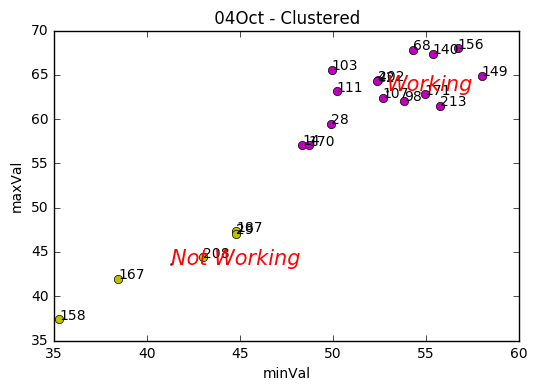

In [15]:
import pylab as P
from pylab import plot,show
from numpy import vstack,array
from scipy.cluster.vq import kmeans,vq

 
classification =['Not Working','Working'] #cluster labels
#merge data into one array
data = np.array([xs,ys]).T

#Determine the cluster means with 2 clusters
centroids,_ = kmeans(data,2)

#2 arrays which information on clusterdata
#vq assigns a code to observations, code can be related to the cluster
idx,_ = vq(data,centroids)
#Colors do not match with previous plots since initializaton of the clusters is 
#done randomly making the order in which the clusters get determined random
for i, txt in enumerate(labels):
    plt.annotate(txt, (xs[i],ys[i]))
plot(data[idx==0,0],data[idx==0,1],'mo',
     data[idx==1,0],data[idx==1,1],'yo') 
plot(centroids[:,0],centroids[:,1],'sb',markersize=1)

#plot the cluster labels by checking position of cluster centeroids
if centroids[0,0]<centroids[1,0]:
    plt.text(centroids[0,0],centroids[0,1], classification[0], style='italic', color='red', fontsize=15) 
    plt.text(centroids[1,0],centroids[1,1], classification[1], style='italic', color='red', fontsize=15)  
if centroids[0,0]>centroids[1,0]:
    plt.text(centroids[1,0],centroids[1,1], classification[0], style='italic', color='red', fontsize=15)
    plt.text(centroids[0,0],centroids[0,1], classification[1], style='italic', color='red', fontsize=15)
P.xlabel('minVal')
P.ylabel('maxVal')


plt.title(' 04Oct - Clustered ')
show()

Repeat the same process for 06 Oct Data

# 06 OCT

In [16]:
with h5py.File('Difference.h5','r') as hf:
    data4Oct= hf.get('04Oct')
    data6Oct= hf.get('06Oct') 
    xs = map(float, data6Oct[:,1])
    ys = map(float,data6Oct[:,2])
    zs = map(float,data6Oct[:,3])
    labels= map(int, data6Oct[:,0])


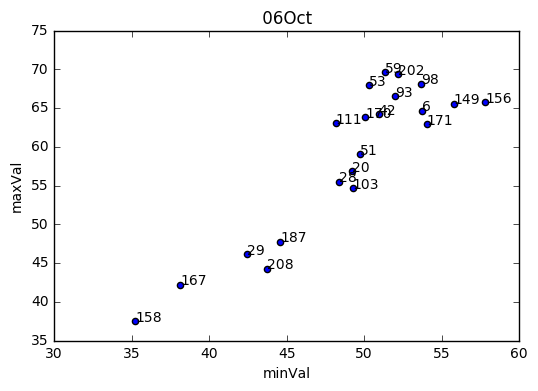

In [20]:

fig, ax = plt.subplots()
ax.scatter(xs, ys)

for i, txt in enumerate(labels):
    ax.annotate(txt, (xs[i],ys[i]))
plt.xlabel('minVal')
plt.ylabel('maxVal')
plt.title(' 06Oct ')
        
plt.show() 

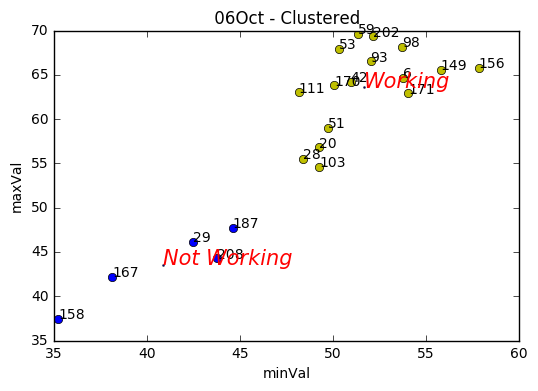

In [22]:

#merge data into one array
data = np.array([xs,ys]).T

#Determine the cluster means with 3 clusters
centroids,_ = kmeans(data,2)

#2 arrays which information on clusterdata
#vq assigns a code to observations, code can be related to the cluster
idx,_ = vq(data,centroids)
#Colors do not match with previous plots since initializaton of the clusters is 
#done randomly making the order in which the clusters get determined random
for i, txt in enumerate(labels):
    plt.annotate(txt, (xs[i],ys[i]))
plot(data[idx==0,0],data[idx==0,1],'bo',
     data[idx==1,0],data[idx==1,1],'yo') 
plot(centroids[:,0],centroids[:,1],'sb',markersize=1)


#plot the cluster labels by checking position of cluster centeroids
if centroids[0,0]<centroids[1,0]:
    plt.text(centroids[0,0],centroids[0,1], classification[0], style='italic', color='red', fontsize=15) 
    plt.text(centroids[1,0],centroids[1,1], classification[1], style='italic', color='red', fontsize=15)  
if centroids[0,0]>centroids[1,0]:
    plt.text(centroids[1,0],centroids[1,1], classification[0], style='italic', color='red', fontsize=15)
    plt.text(centroids[0,0],centroids[0,1], classification[1], style='italic', color='red', fontsize=15)    
P.xlabel('minVal')
P.ylabel('maxVal')


plt.title(' 06Oct - Clustered ')
show()

# Testing the code on Monthly Alarm

To verify if our code was working we used the montly alarm data to check the clustering. 

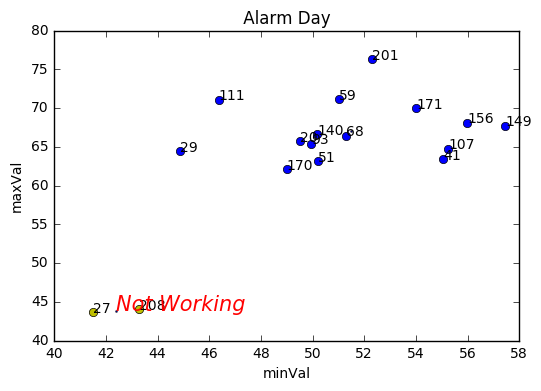

In [26]:

#location of alarm data
location = 'C:\\Users\\Danita\\Desktop\\sensorCityData\\03Oct\\GIT_cc14a7a227c856aee6e0b541b97a77aabb8d3307-2016-10-15-13-56\\ptne\\hdf5\\2016-10-15'
#create arrays to hold the sensor node number, min value and max value for all the sensors
filenameArray=np.array([]).reshape(0,1)
minValAlarm= np.array([]).reshape(0,1)
maxValAlarm= np.array([]).reshape(0,1)

#open the file and get enegry data and for row 4 of energy data obtain the min and max values
for filename in os.listdir(location):

    fullPath = os.path.join(location, filename)
    soundData = h5py.File(fullPath , 'r')
    energyVal = soundData.get('energy') 
    energyArray= np.array(energyVal)

    for val in range(4,5):
        minValAlarm = np.append(minValAlarm, np.amin(energyArray[val]))
        maxValAlarm = np.append(maxValAlarm, np.amax(energyArray[val]))
        diff1 = maxValAlarm - minValAlarm

    
    filenameArray= np.append(filenameArray, filename[:-5])



#merge data into one array
data = np.array([minValAlarm,maxValAlarm]).T

#Determine the cluster means with 2 clusters
centroids,_ = kmeans(data,2)

#2 arrays which information on clusterdata
#vq assigns a code to observations, code can be related to the cluster
idx,_ = vq(data,centroids)
#Colors do not match with previous plots since initializaton of the clusters is 
#done randomly making the order in which the clusters get determined random
for i, txt in enumerate(filenameArray):
    plt.annotate(txt, (minValAlarm[i],maxValAlarm[i]))
plot(data[idx==0,0],data[idx==0,1],'bo',
     data[idx==1,0],data[idx==1,1],'yo',) 
plot(centroids[:,0],centroids[:,1],'sb',markersize=1)


if centroids[0,0]<centroids[1,0]:
    plt.text(centroids[0,0],centroids[0,1], classification[0], style='italic', color='red', fontsize=15)   
if centroids[0,0]>centroids[1,0]:
    plt.text(centroids[1,0],centroids[1,1], classification[0], style='italic', color='red', fontsize=15) 
    
P.xlabel('minVal')
P.ylabel('maxVal')

plt.title(' Alarm Day ')
show()
   


From the above image we can see that while 2 of the sensors are classified as definately not working, another 7 are classified as working while in the previous two trials they are classified as not working. This could be due to factors such as the sensors may be working but their output consists of a lot of noise so they are unable to pick up everyday sound signals such as traffic. On closer inspection we found that sensor 29 was the only one clustered incorrectly as the others did not have raw data from the alarm day and so were not clustered.

# Dimensionality Reduction 

With the following code we try to analyze the main components of variance in the dataset from the raw data and cluster to check if we get a more accurate picture. For the alarm day the most variation in all the datasets should come from the alarm itself. Since the system needs to work on both alarm and normal days we tried applying the reduction techniques to 04 Oct data as well considering that traffic is the main source of variation on normal days.

### Visualization of raw data from 4 Oct 2016

103


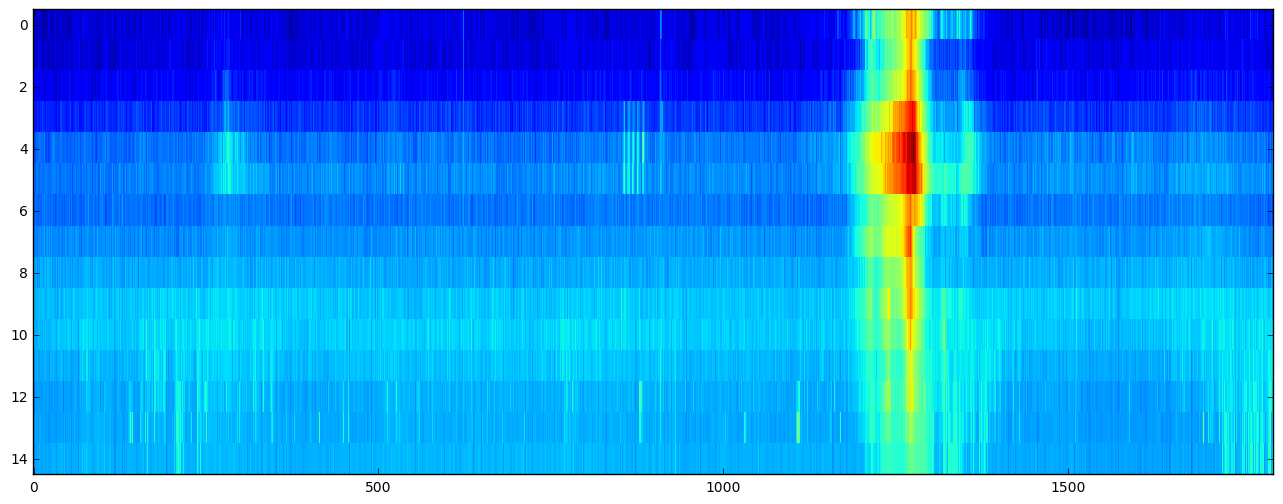

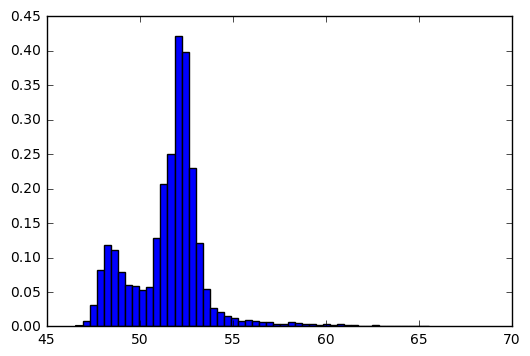

107


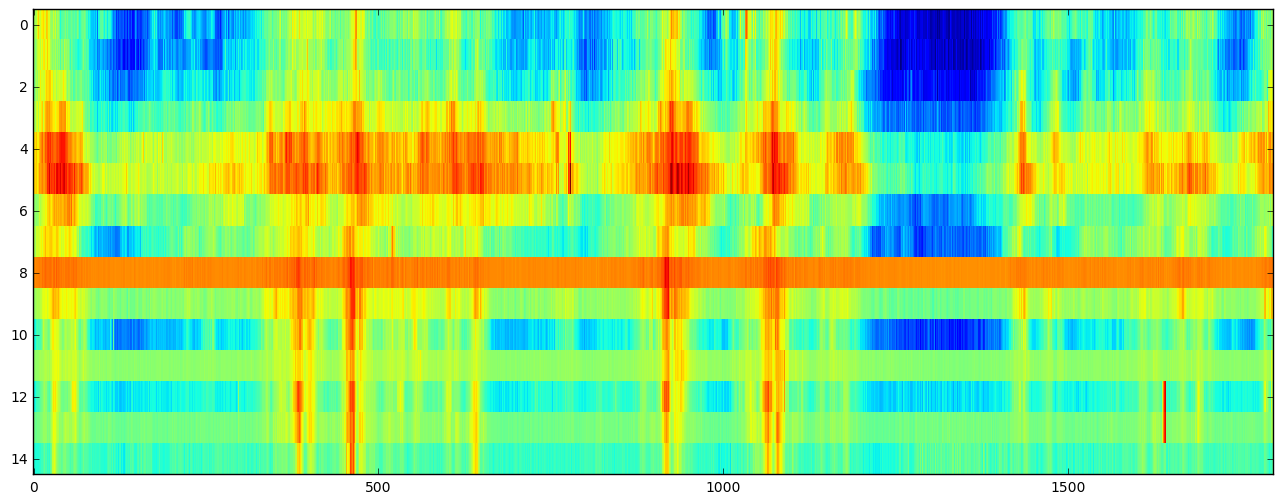

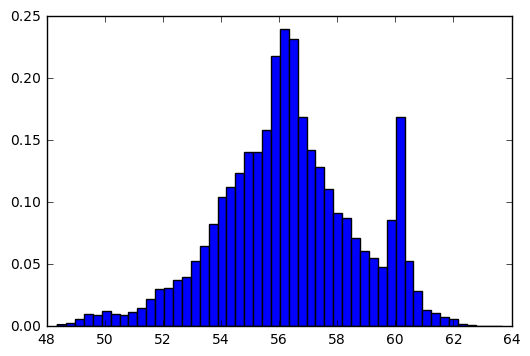

111


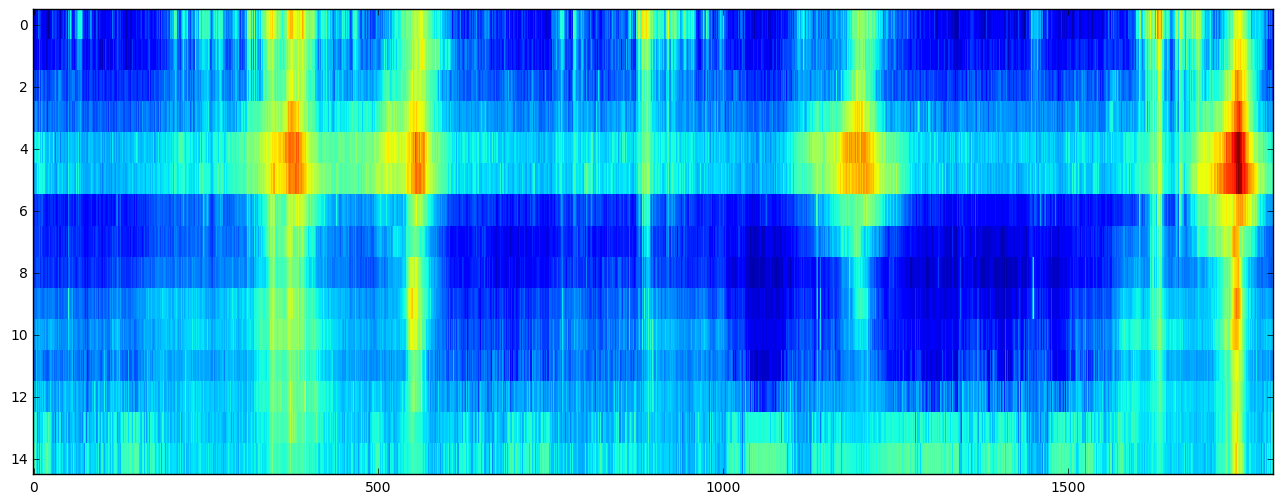

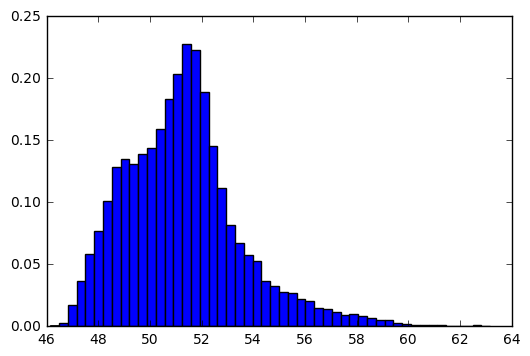

14


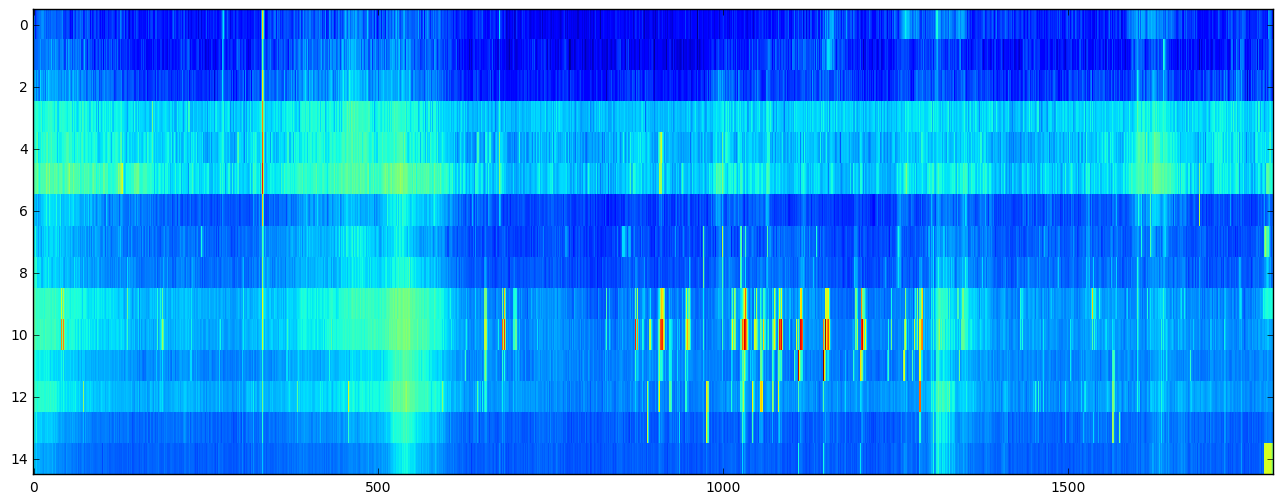

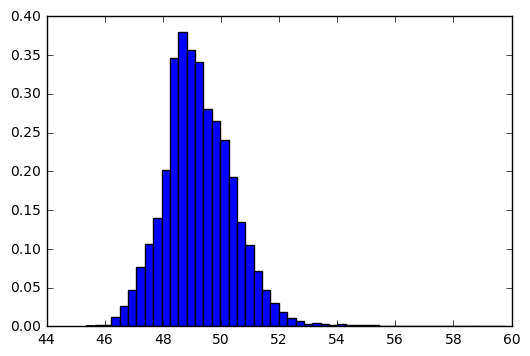

140


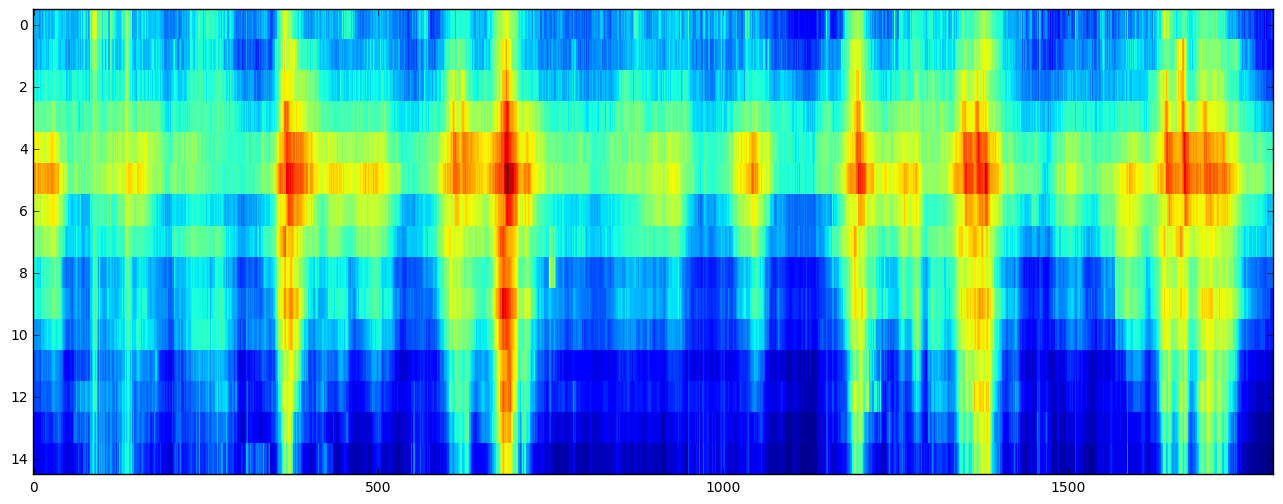

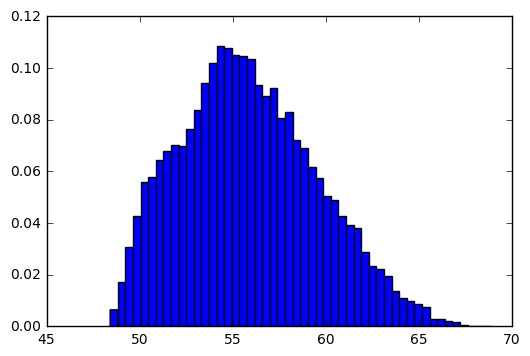

149


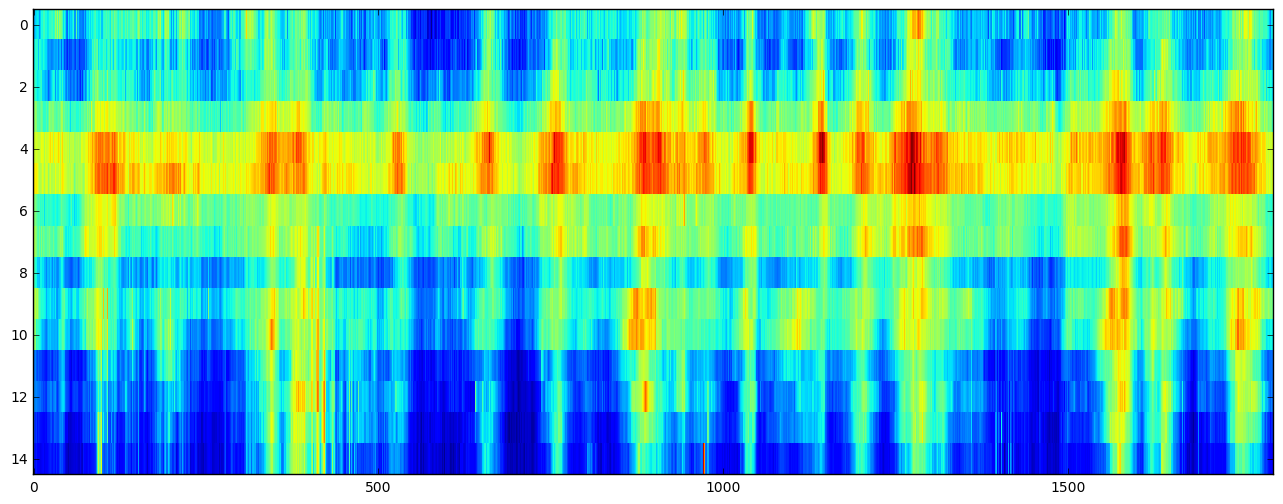

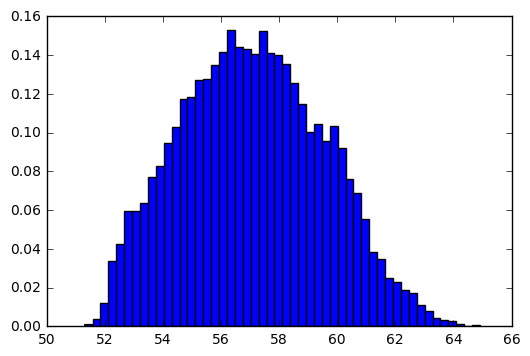

156


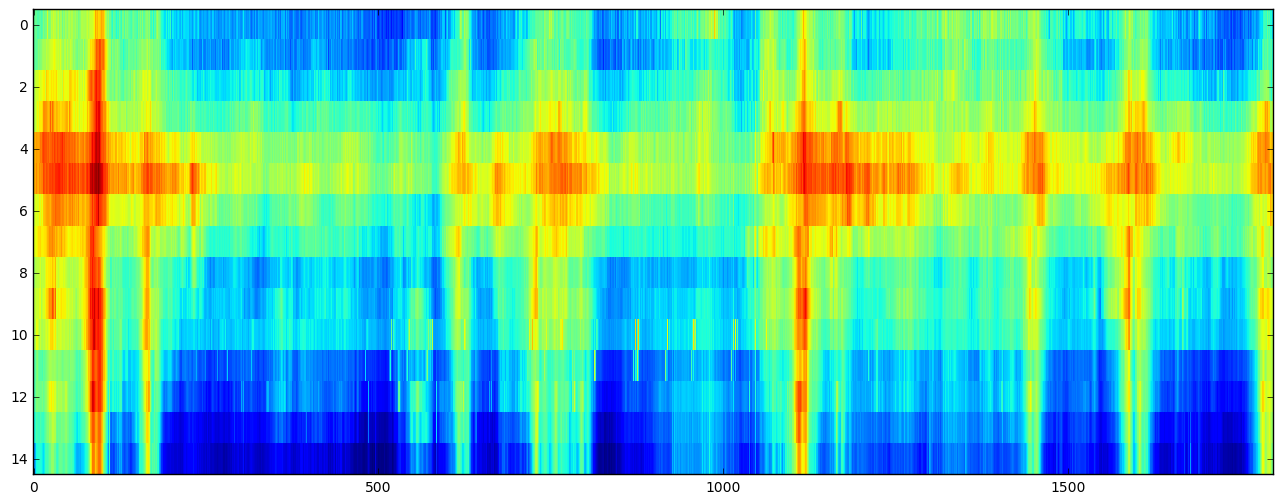

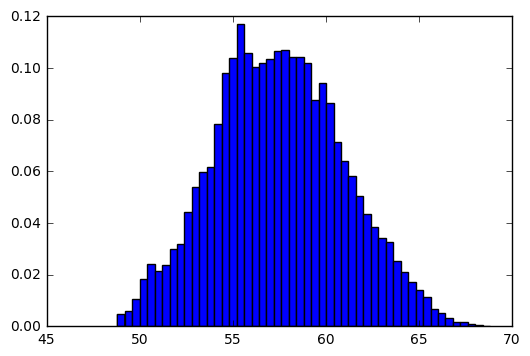

158


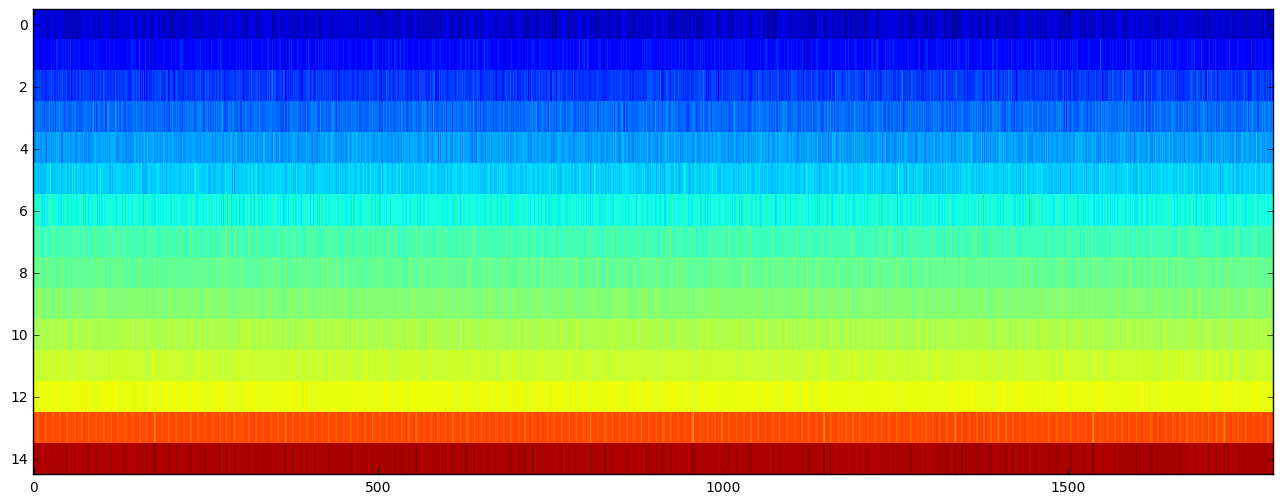

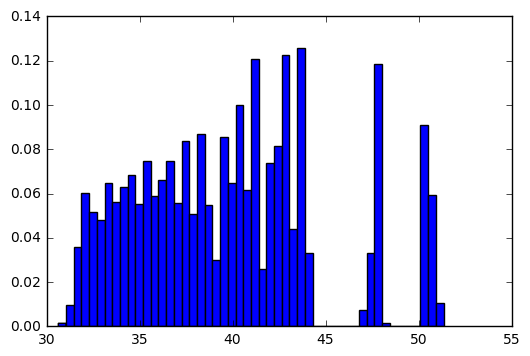

167


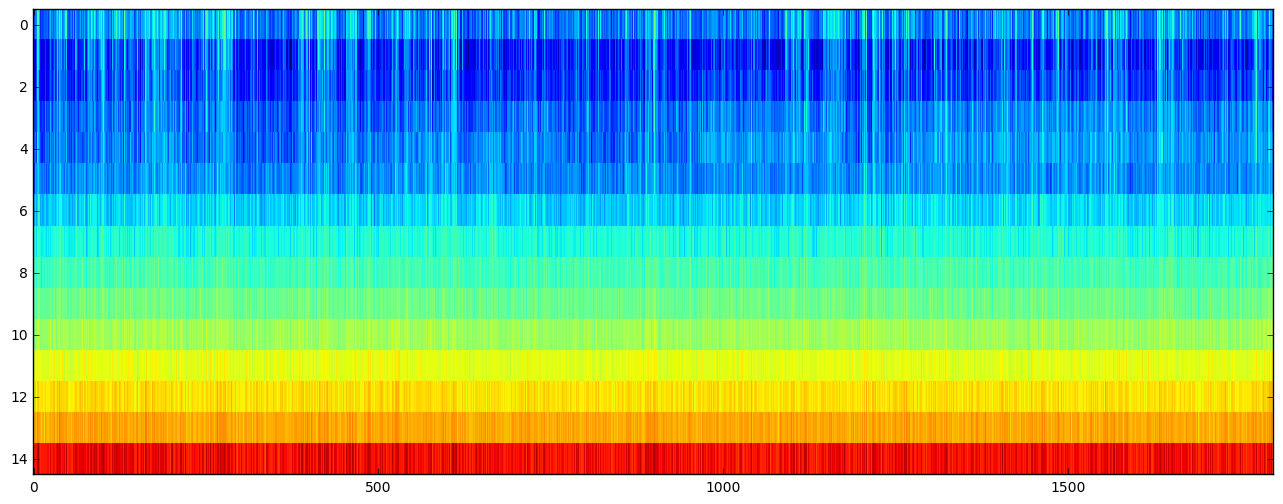

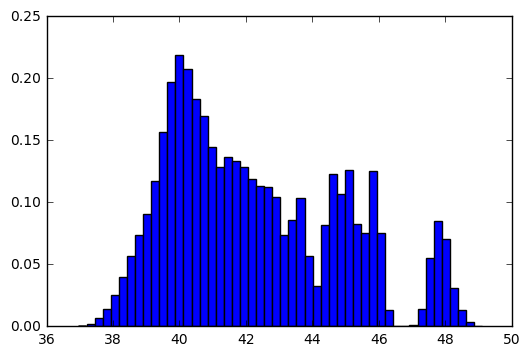

170


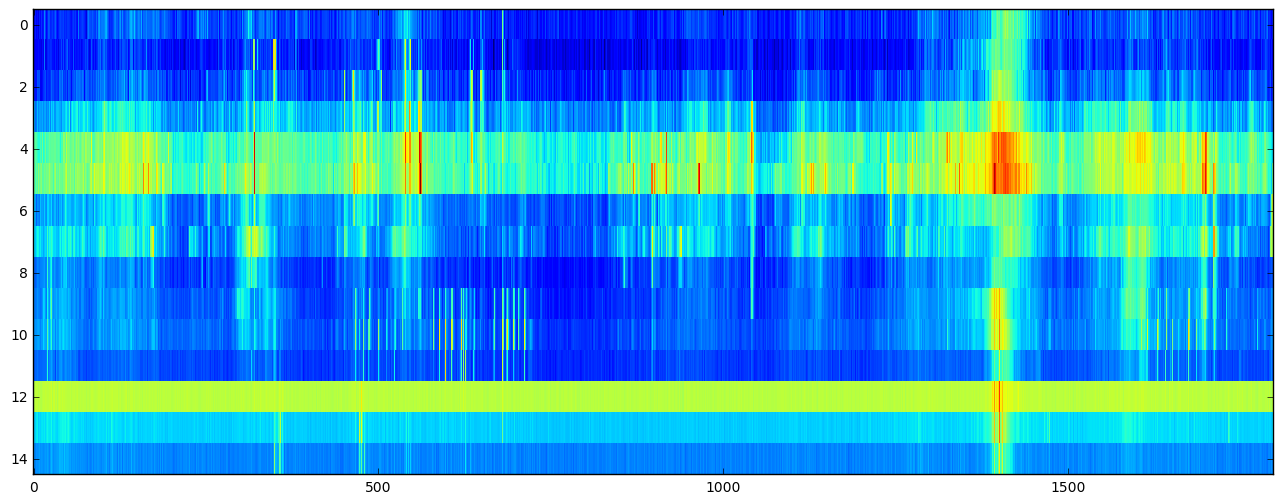

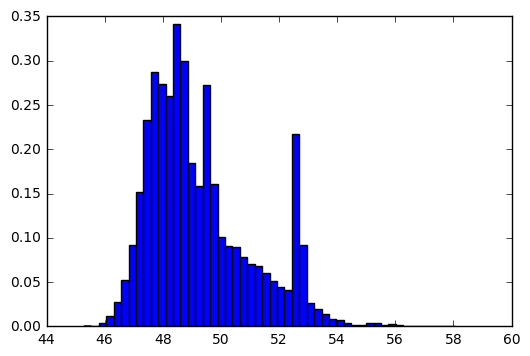

171


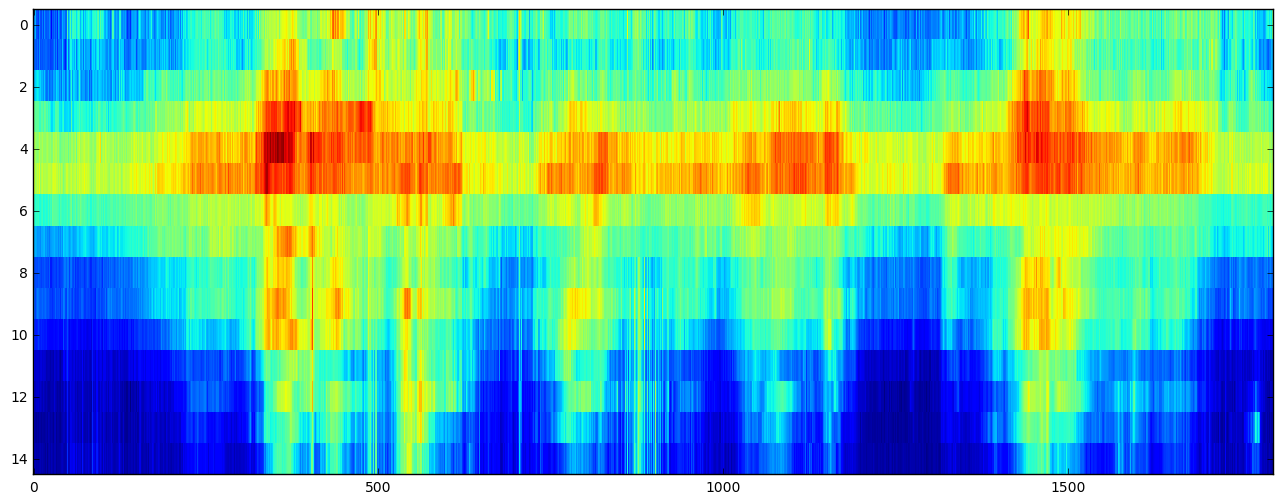

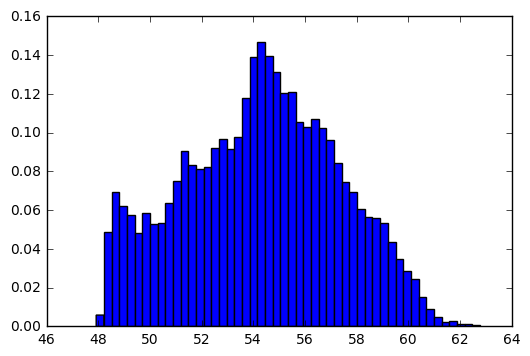

187


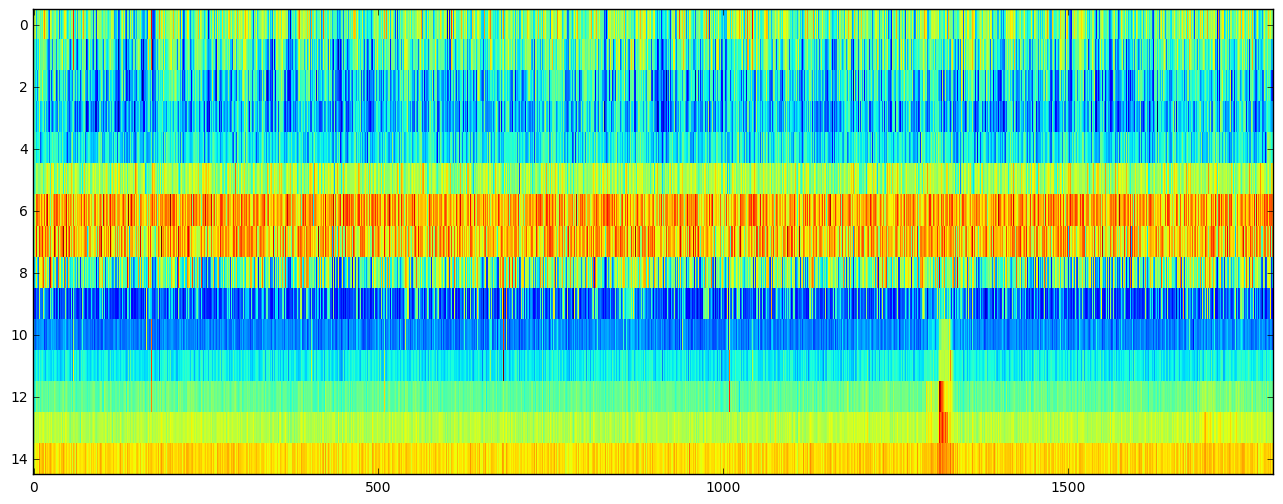

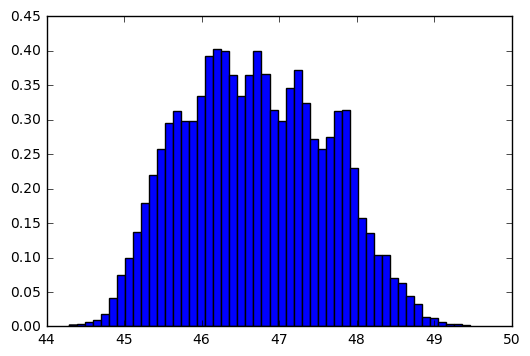

202


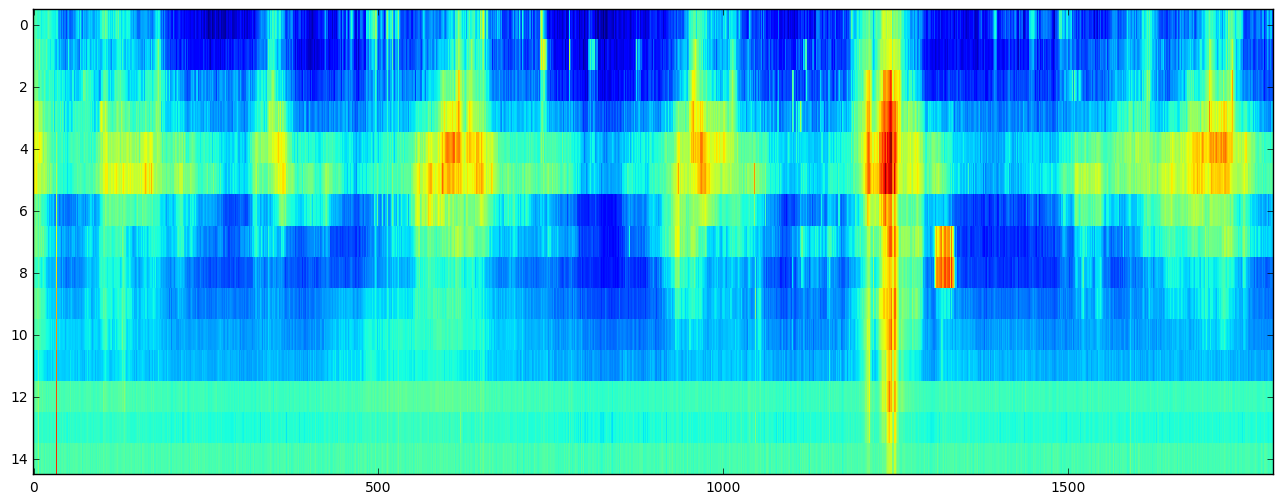

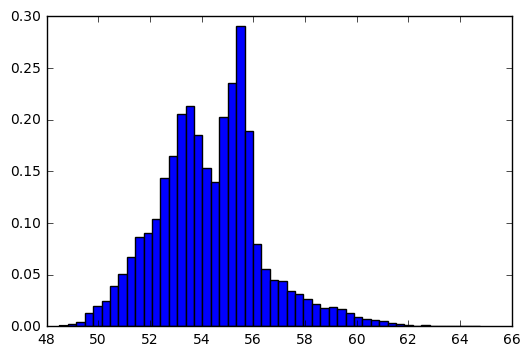

208


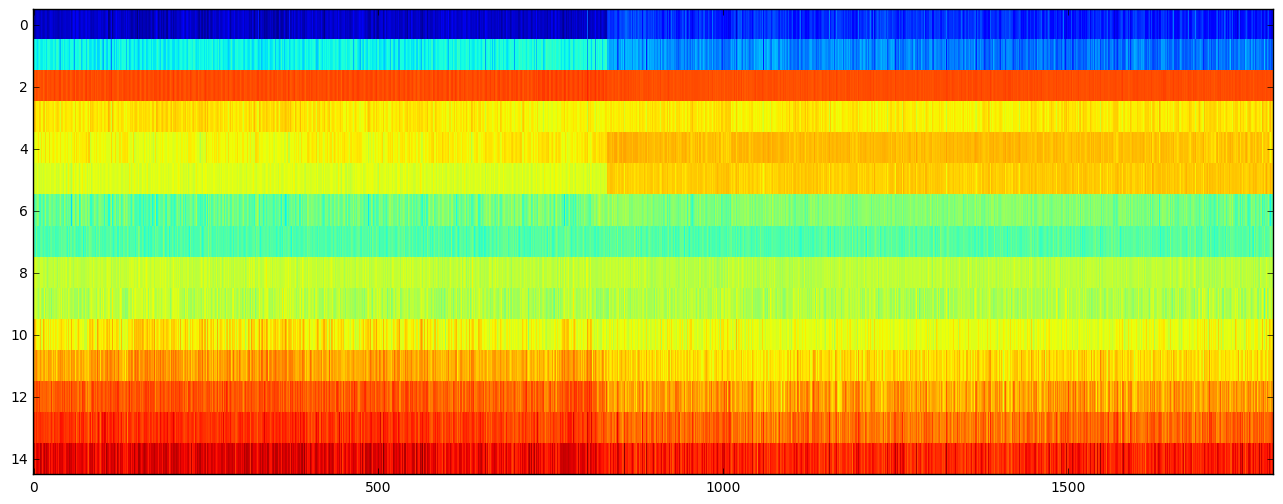

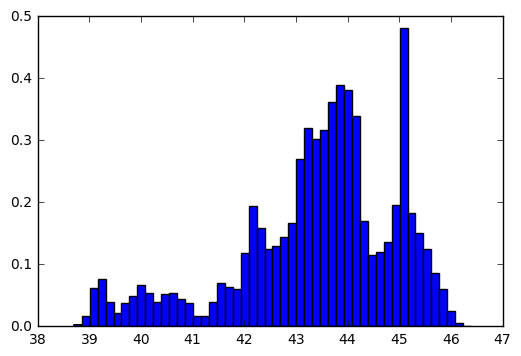

213


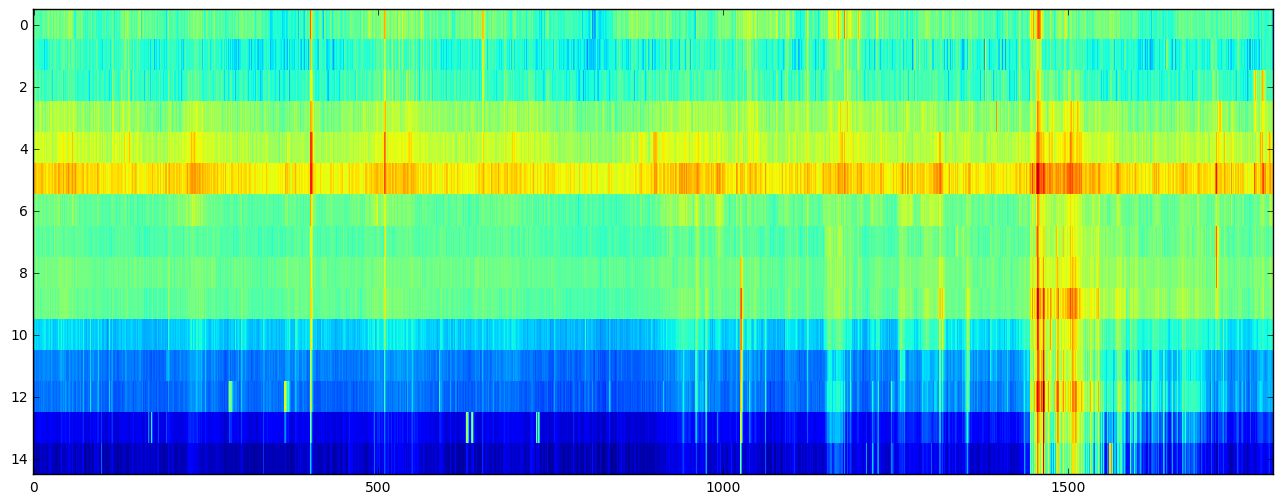

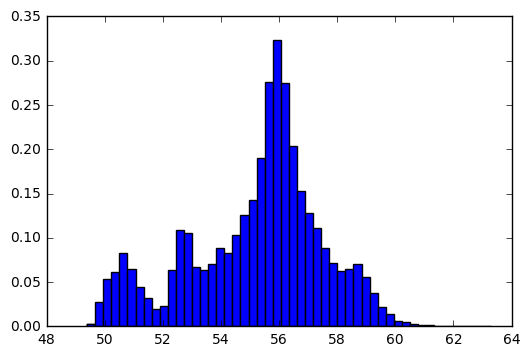

28


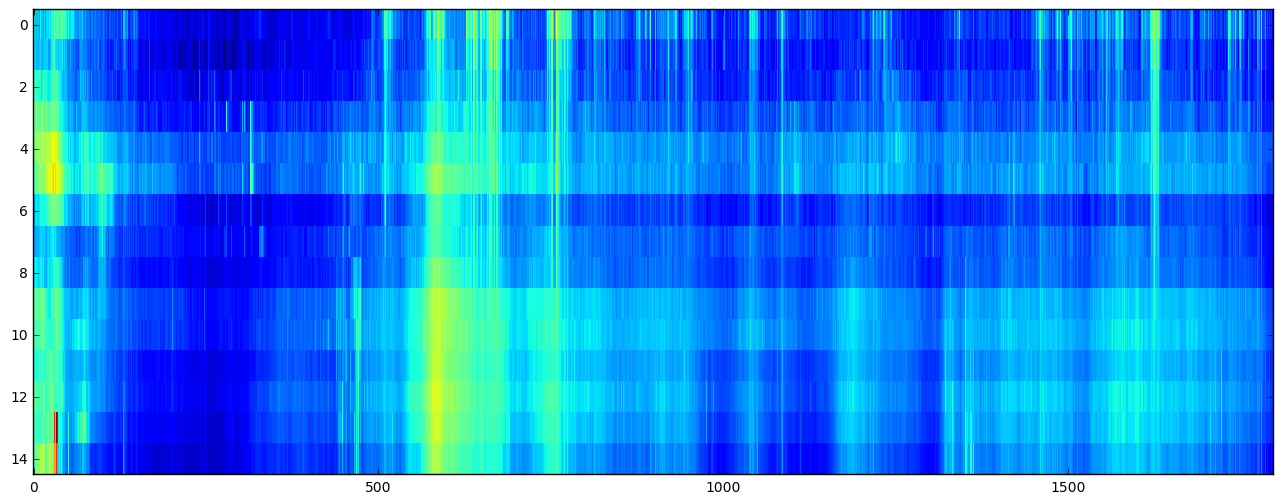

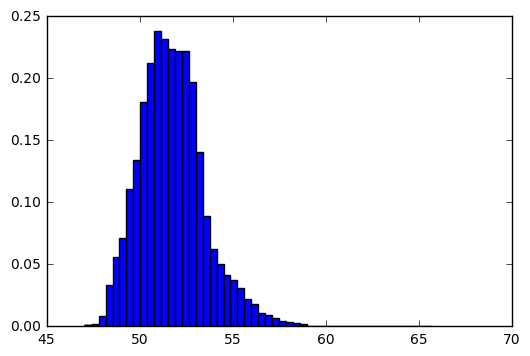

29


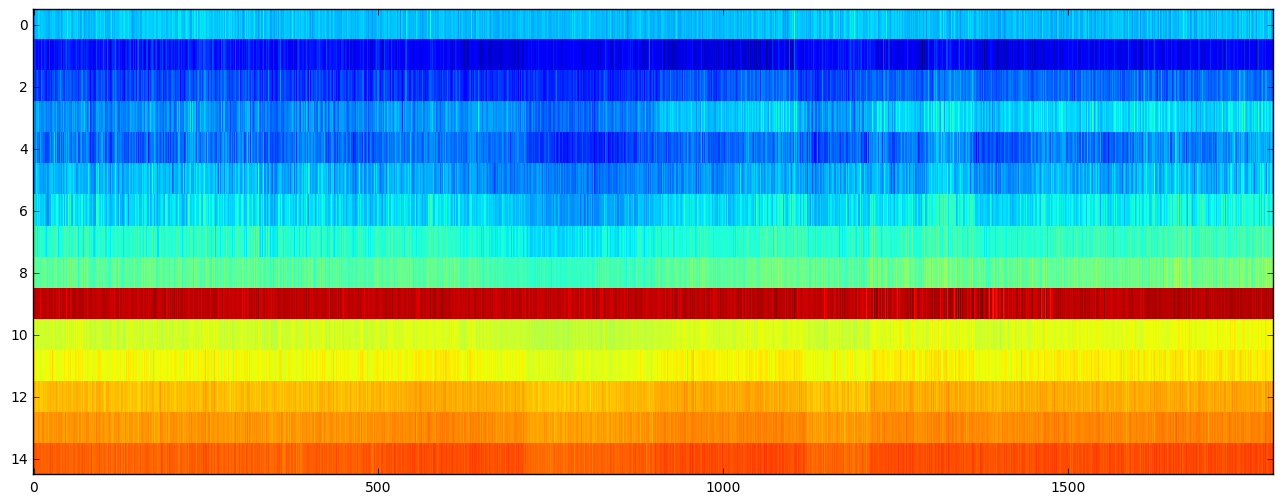

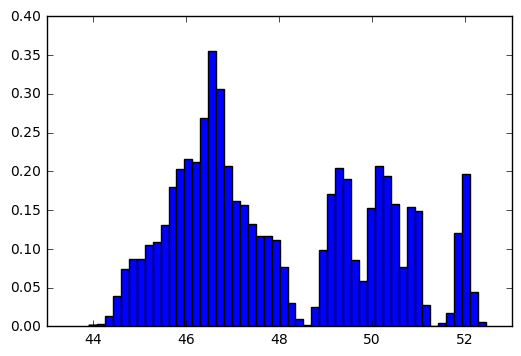

42


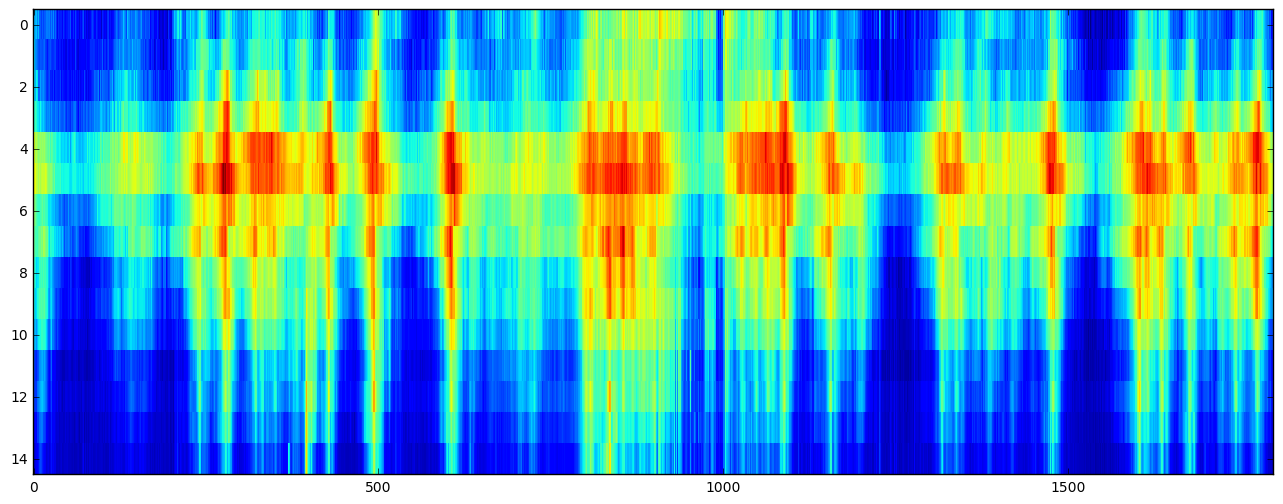

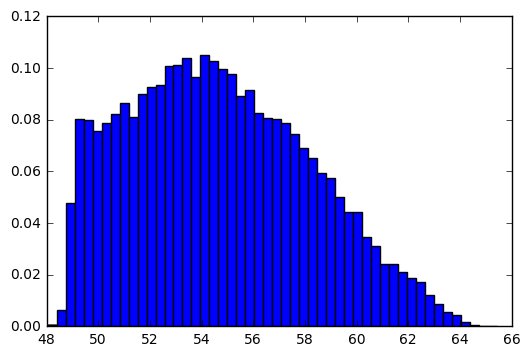

68


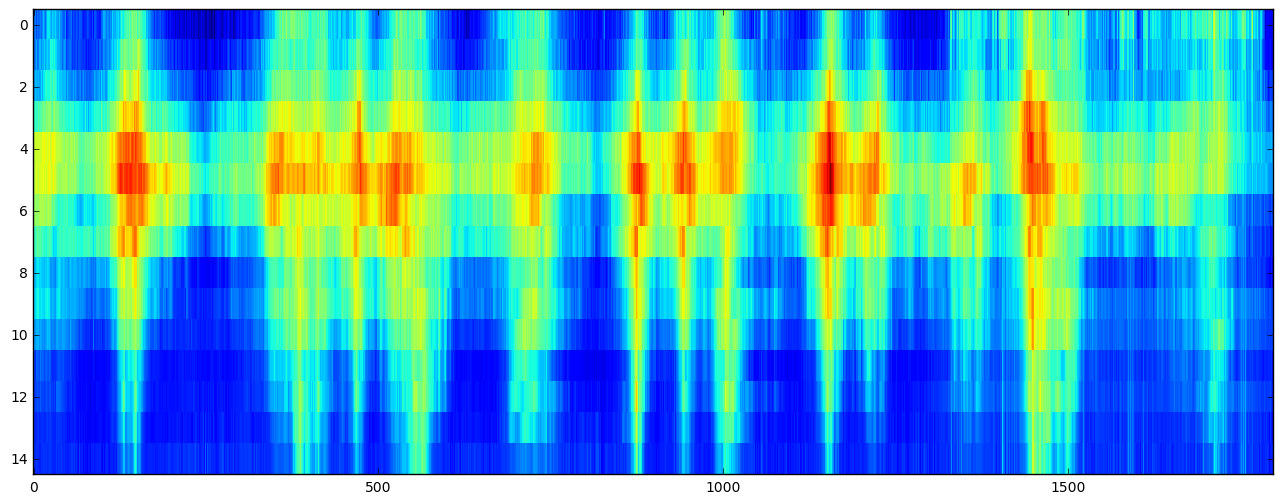

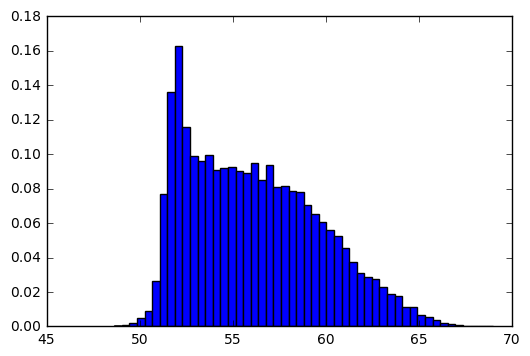

98


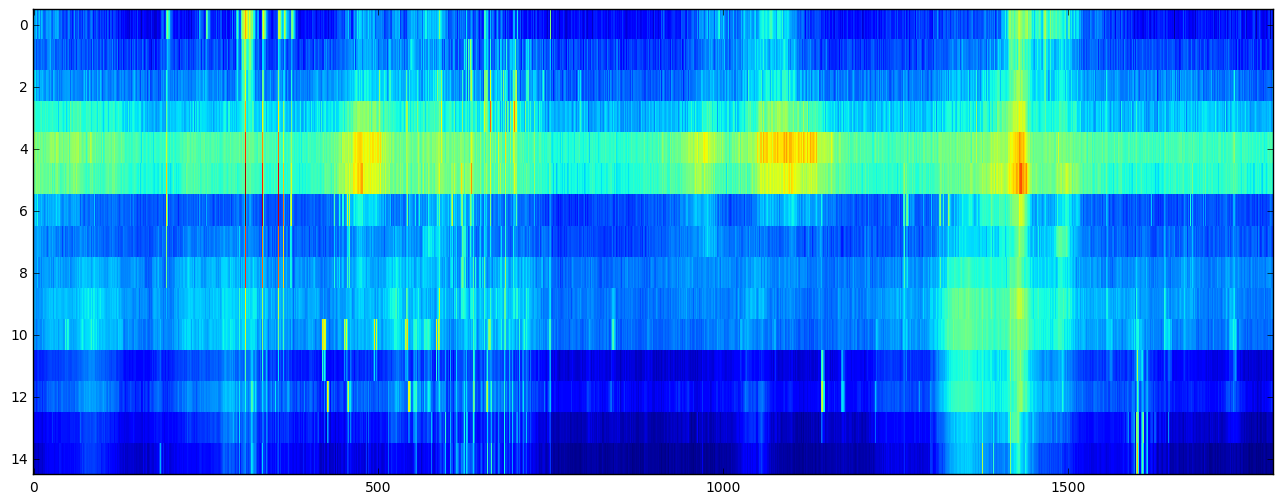

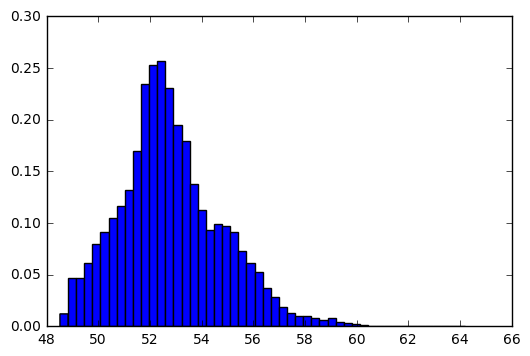

['103' '107' '111' '14' '140' '149' '156' '158' '167' '170' '171' '187'
 '202' '208' '213' '28' '29' '42' '68' '98']


In [27]:
location = 'C:\\Users\\Danita\\Desktop\\sensorCityData\\04Oct\\GIT_cc14a7a227c856aee6e0b541b97a77aabb8d3307-2016-10-21-17-13\\ptne\\hdf5\\2016-10-21'
varforPCA=np.array([]).reshape(0,26970)
filenameArray1= np.array([]).reshape(0,1)
for filename in os.listdir(location):

    fullPath = os.path.join(location, filename)
    soundData = h5py.File(fullPath , 'r')
    energyVal = soundData.get('energy') 
    energyArray= np.array(energyVal)
    print filename[9:-32]
    f=plt.figure(figsize=(16,6))
    ax = f.add_subplot(111)
    ax.imshow(energyArray[0:15], interpolation='nearest',aspect='auto')
    
    m,n = energyArray[0:15].shape
    #create an array of energy values of all the energy data in the files between row 0-15(the other rows were not used as they have
    #a lot of null values)
    varforPCA=np.vstack([varforPCA, energyArray[0:15].flatten()])
    filenameArray1= np.append(filenameArray1,filename[9:-32])
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    hist = ax1.hist(energyArray[0:15].flatten(),50, normed=1)
    plt.show()
print filenameArray1



        



### Visualization after dimensionality reduction- PCA

PCA is not the ideal solution for this data set as from the histograms we can tell that the distrubution for only some of the images is gaussian. For those images PCA will work best but for the remainder of the images ICA should give better results to seperate the different components of the sound, reduce its dimensions and then cluster the output.
Here we check what result PCA gives so we can compare it to ICA results

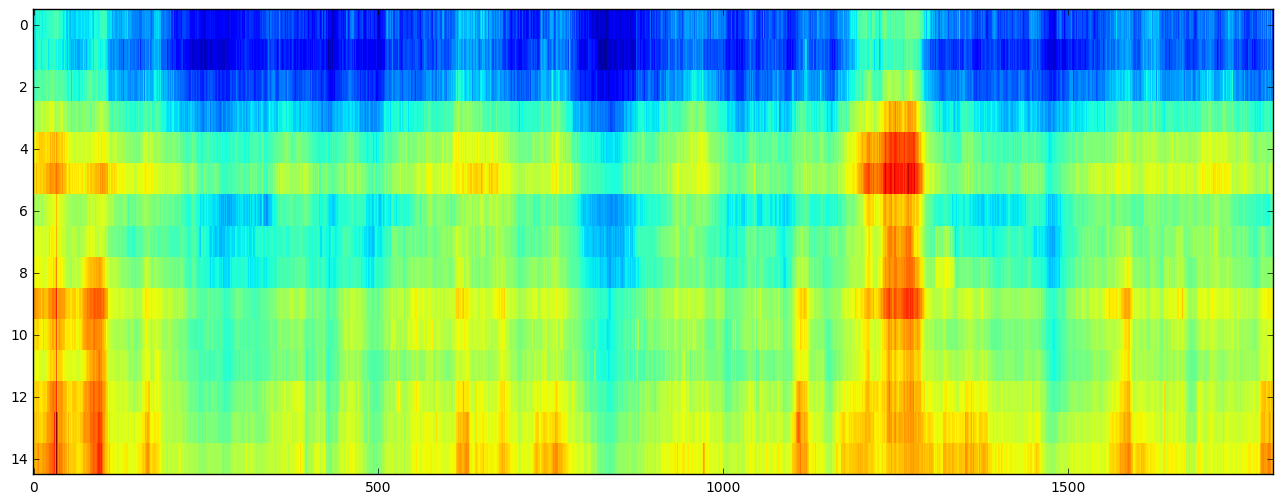

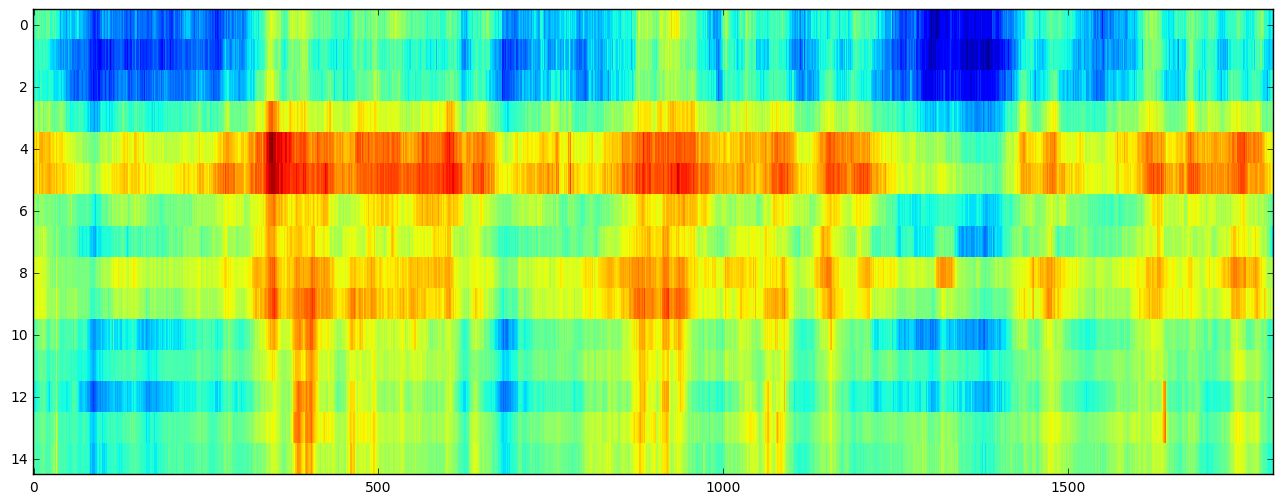

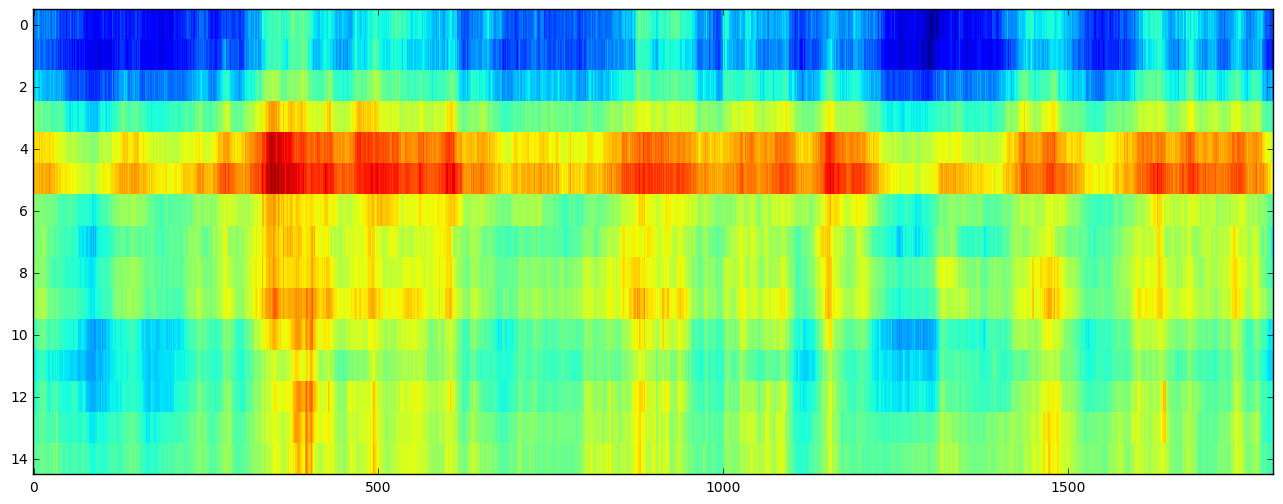

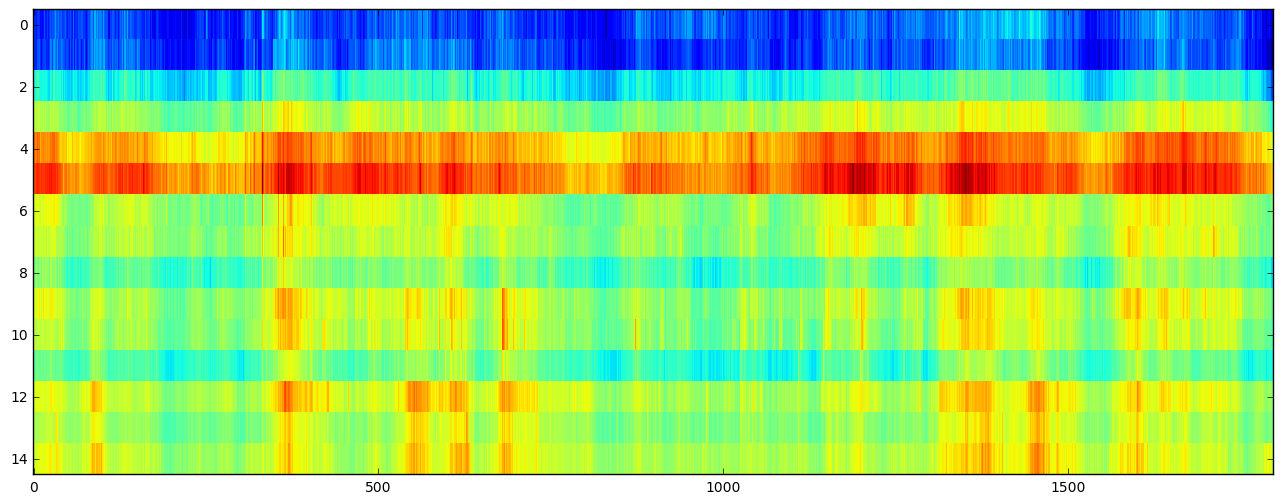

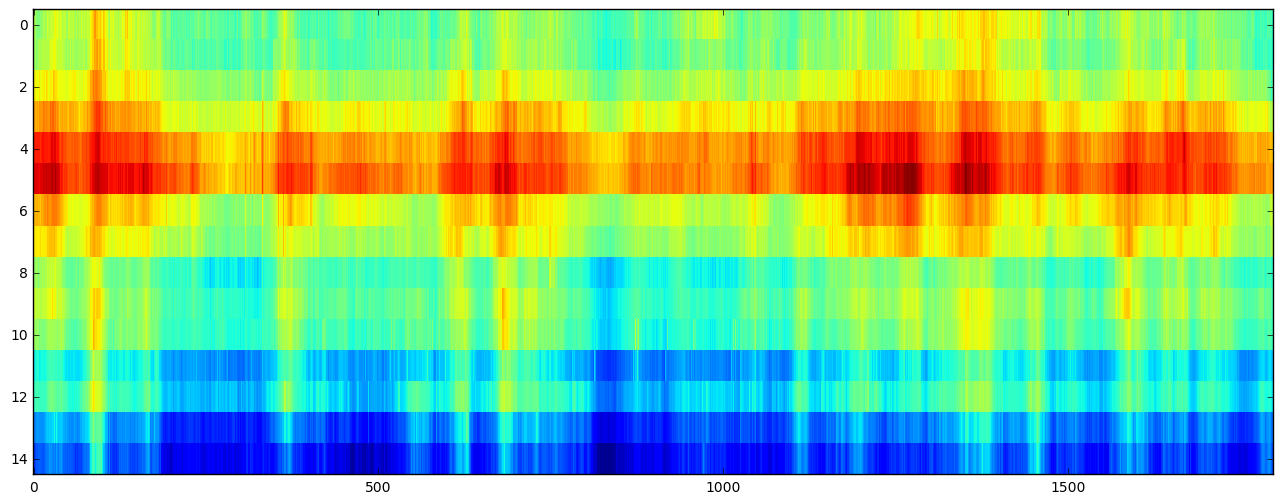

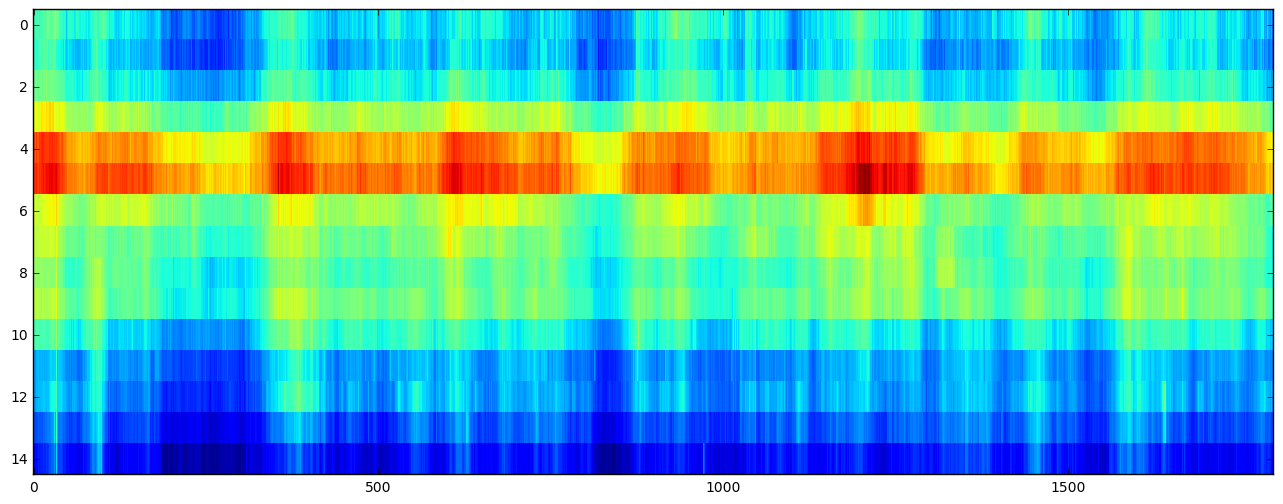

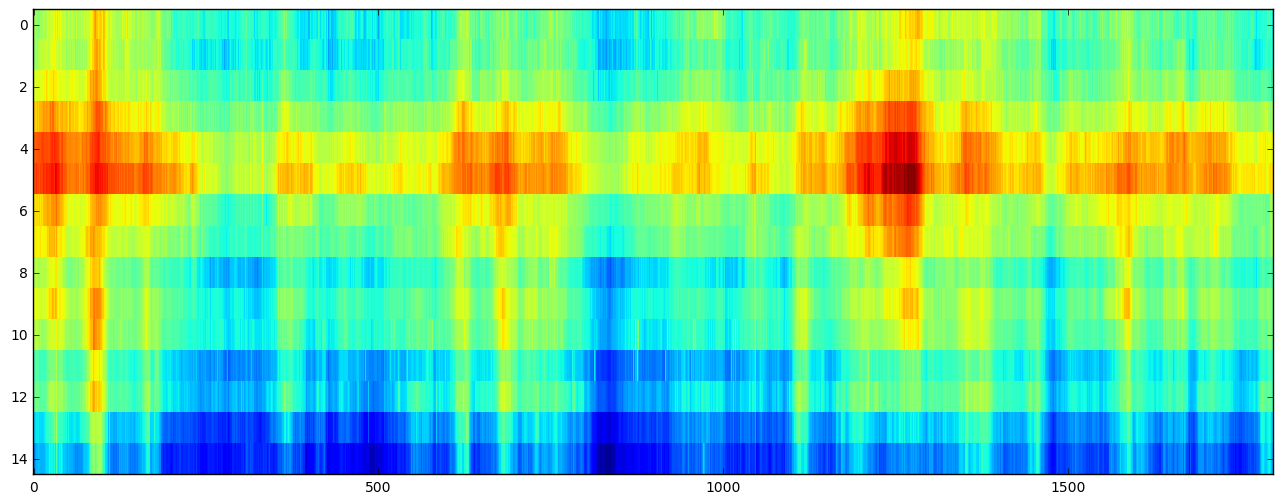

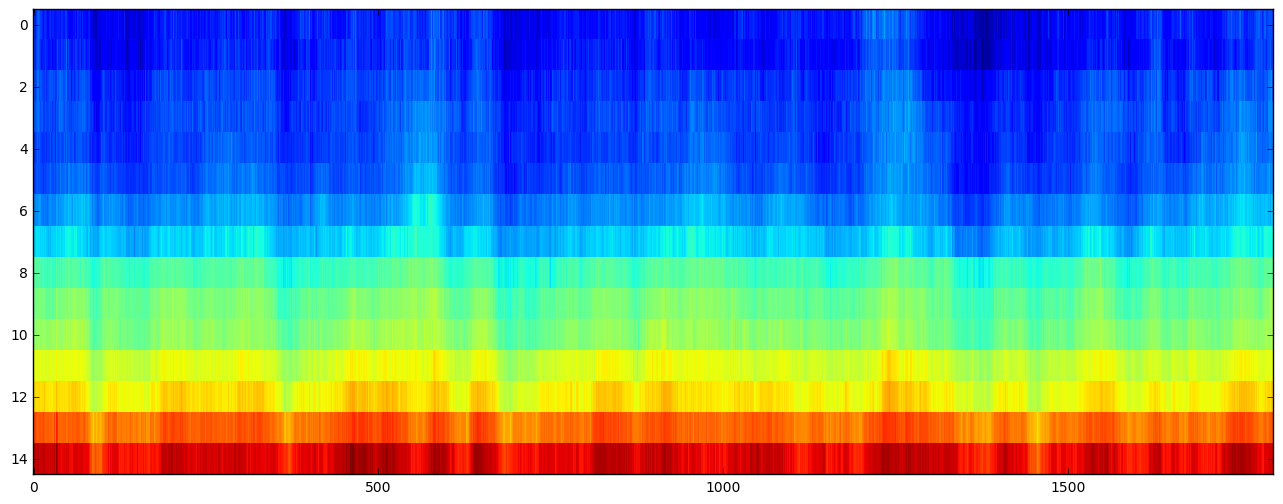

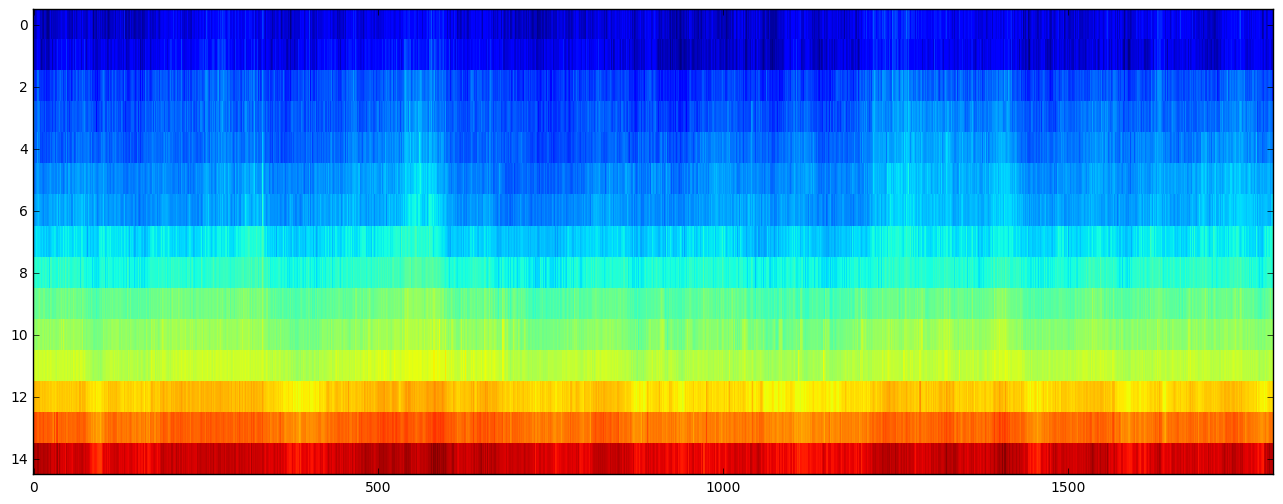

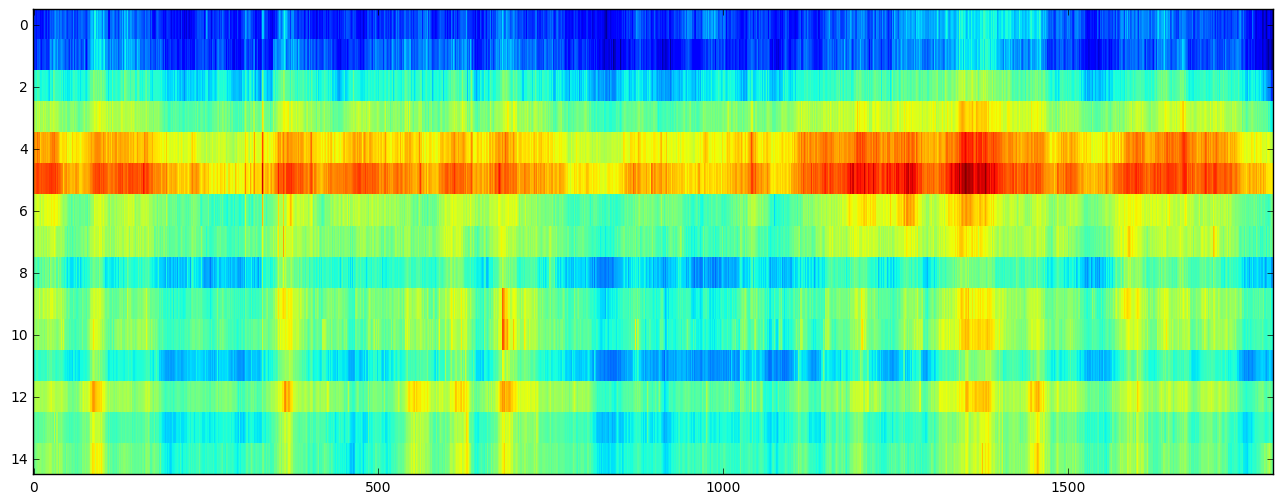

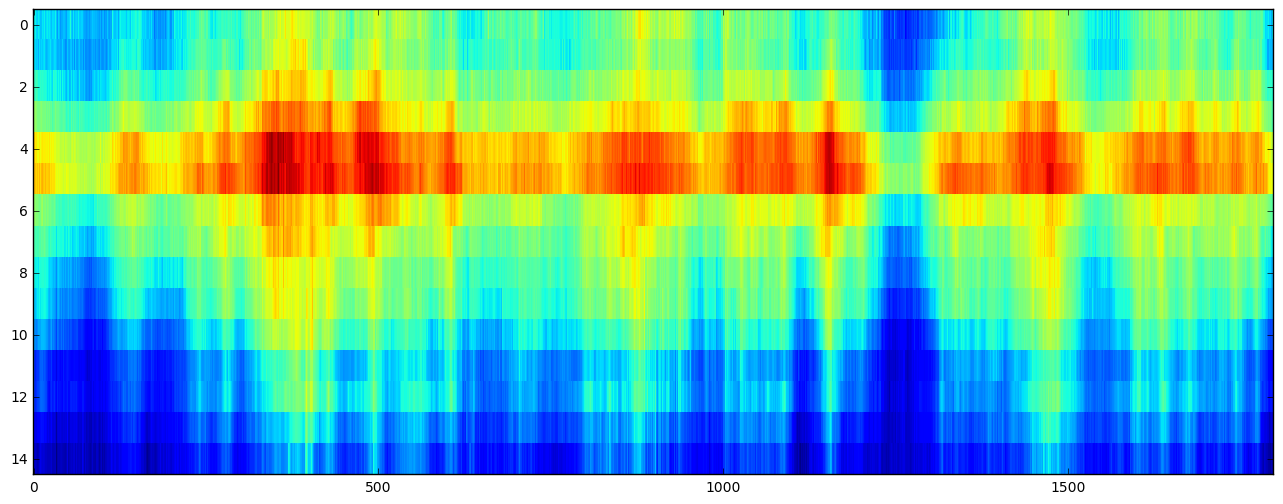

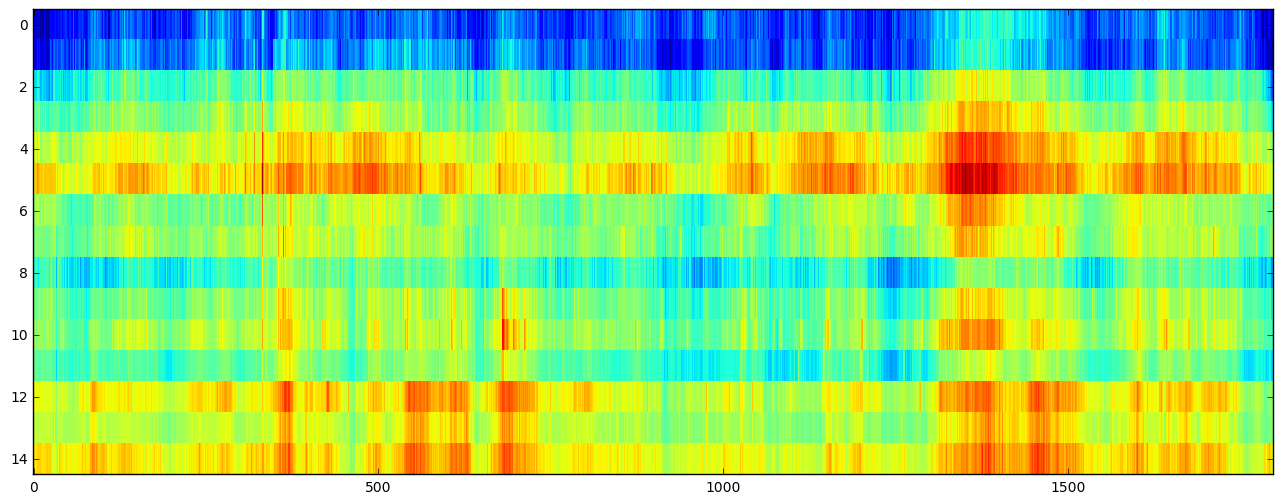

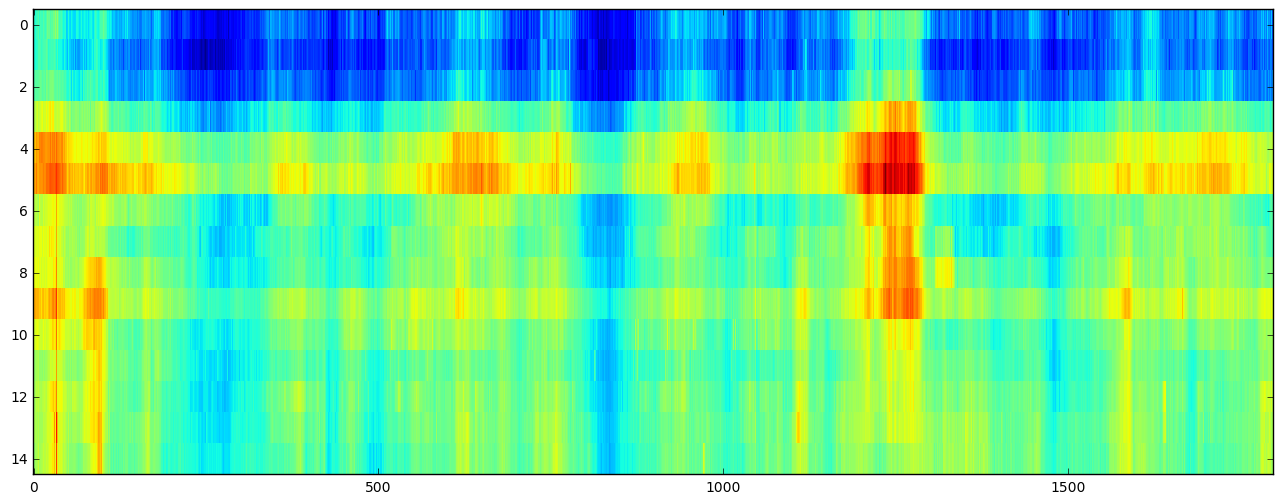

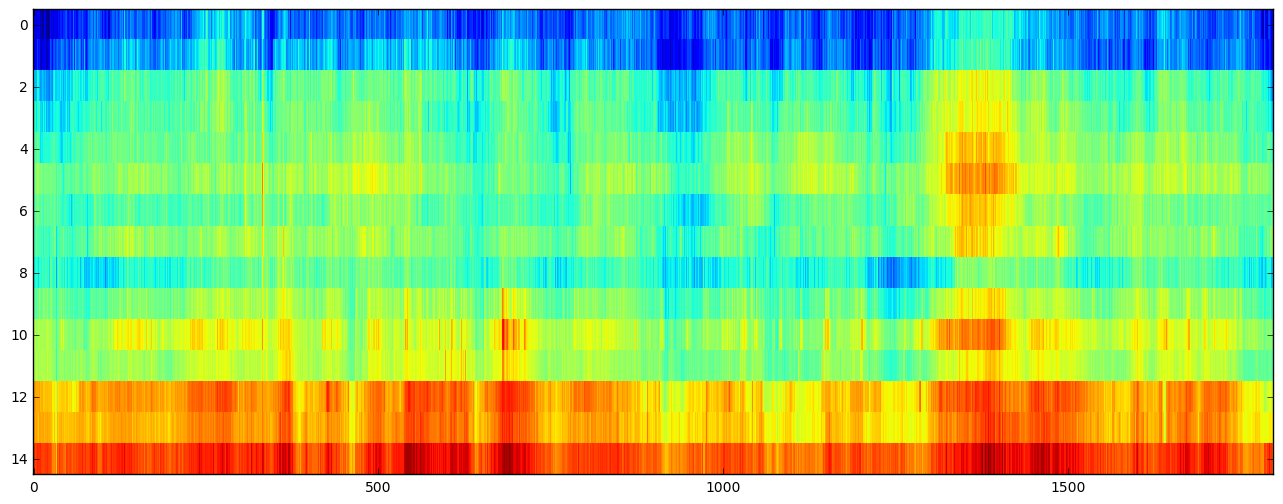

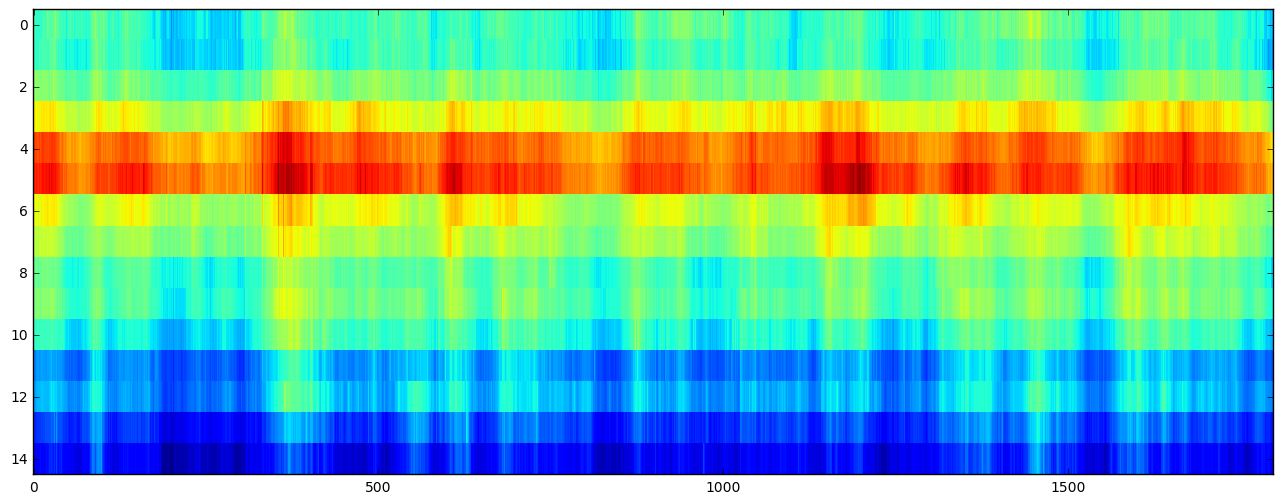

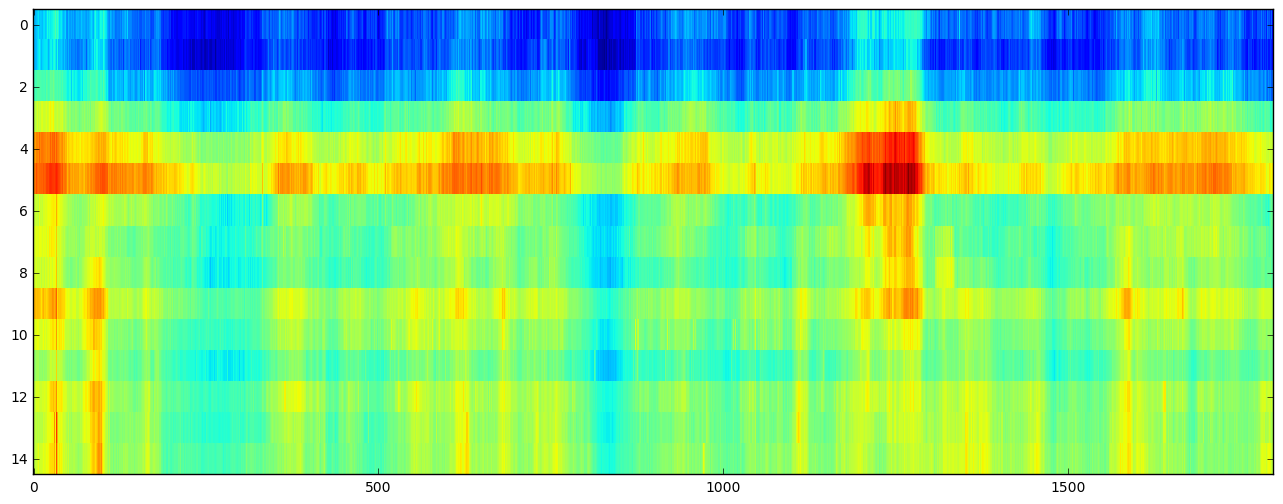

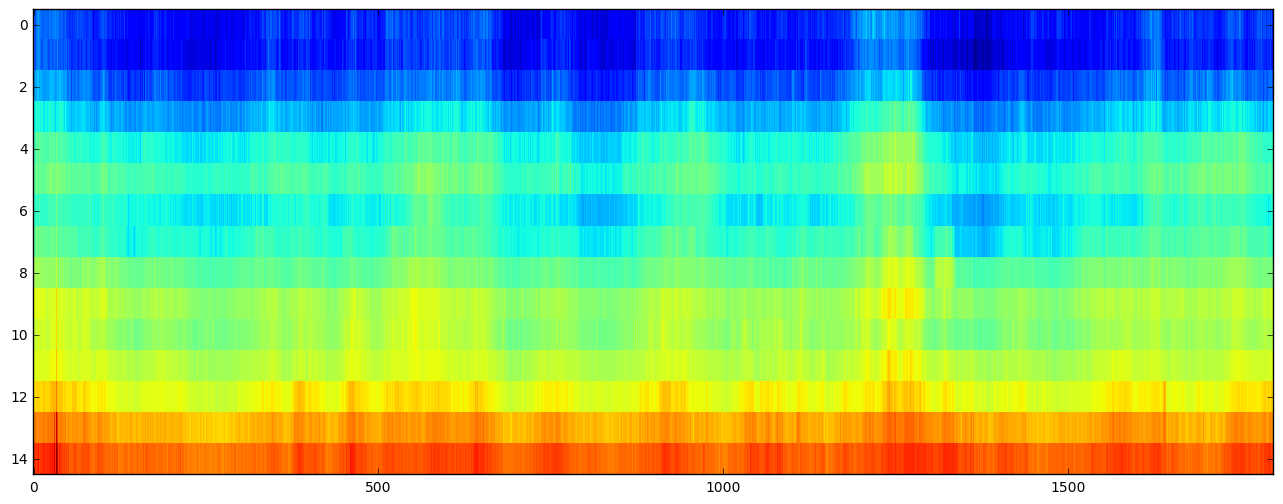

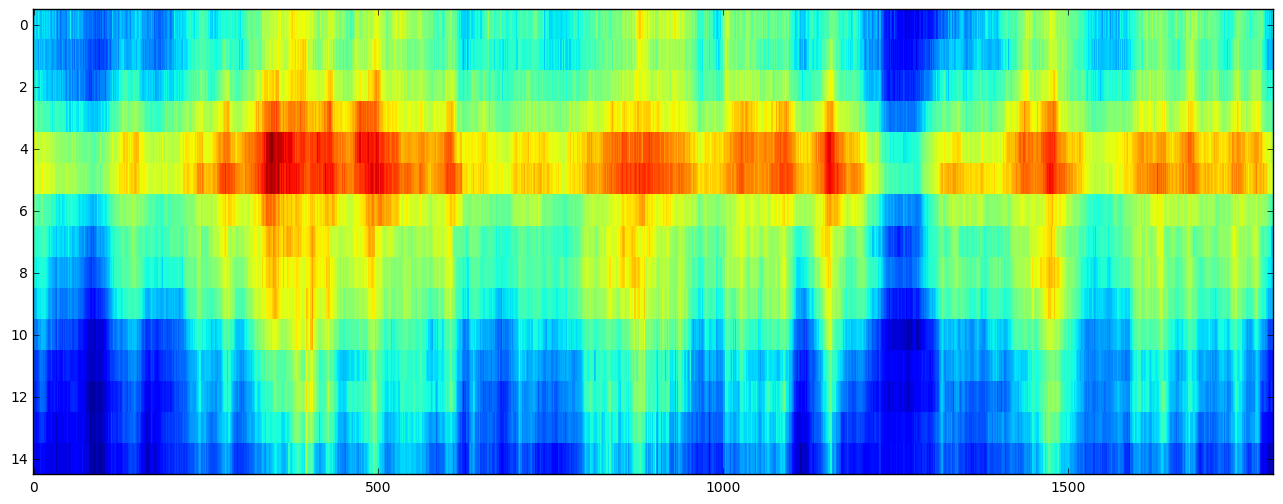

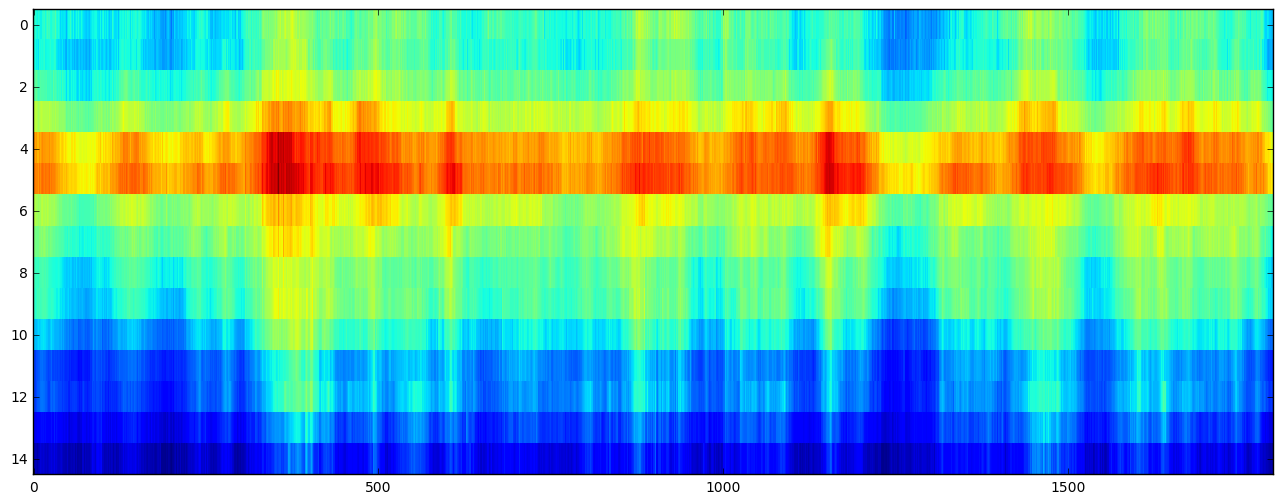

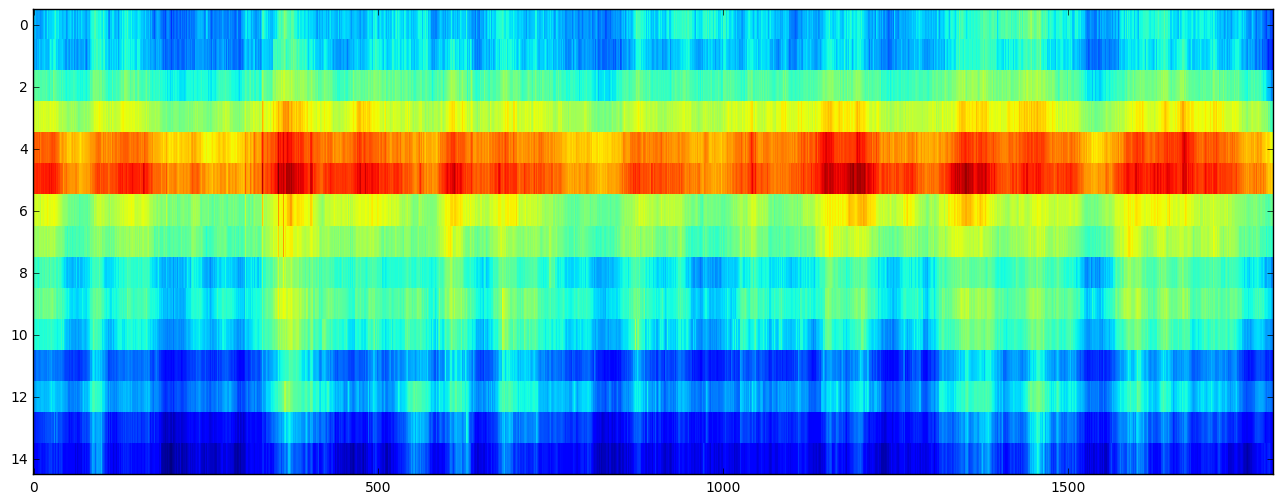

In [28]:
from sklearn.decomposition import PCA as skPCA
from scipy import stats
from matplotlib import cm
#convert the array to a matrix from an array format
dataArray = np.asmatrix(varforPCA)
#apply PCA on data 
#n_components was selected to be 3 as we expect at most background noise to account for one source, the siren as another and 
#traffic as another source
pca = skPCA(n_components=3)
#perform PCA on data
X1= pca.fit_transform(dataArray)
#reconstruct dimensionally reduced data
reconstruct = pca.inverse_transform(X1)

#print the data
for x in reconstruct:
    recon = x
    recon = np.abs(recon)
    recon = recon.reshape(m,n)
    f=plt.figure(figsize=(16,6))
    ax = f.add_subplot(1,1,1)
    ax = f.add_subplot(1,1,1)
    ax.imshow(recon, interpolation='nearest',aspect='auto')  
#    ax.matshow(recon, interpolation='nearest', cmap=cm.jet)
    plt.show() 

After PCA the below block prints the results of clustering 

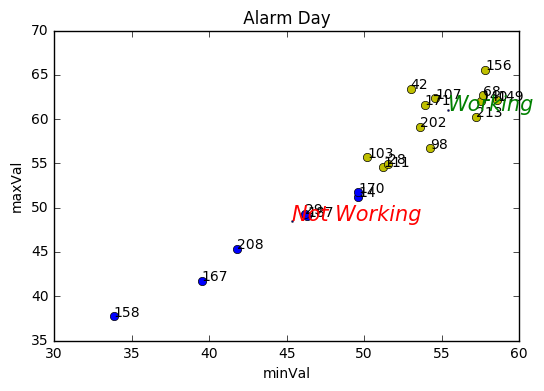

In [29]:

#filenameArray=np.array([]).reshape(0,1)
minValAlarm= np.array([]).reshape(0,1)
maxValAlarm= np.array([]).reshape(0,1)

for i in xrange(len(reconstruct)):
    recon = reconstruct[i]
    recon = np.abs(recon)
    recon = recon.reshape(m,n)

    for val in range(4,5):
        minValAlarm = np.append(minValAlarm, np.amin(recon[val]))
        maxValAlarm = np.append(maxValAlarm, np.amax(recon[val]))


#merge data into one array
data = np.array([minValAlarm,maxValAlarm]).T

#Determine the cluster means with 3 clusters
centroids,_ = kmeans(data,2)

#2 arrays which information on clusterdata
#vq assigns a code to observations, code can be related to the cluster
idx,_ = vq(data,centroids)
#Colors do not match with previous plots since initializaton of the clusters is 
#done randomly making the order in which the clusters get determined random
for i, txt in enumerate(filenameArray1):
    plt.annotate(txt, (minValAlarm[i],maxValAlarm[i]))
plot(data[idx==0,0],data[idx==0,1],'bo',
     data[idx==1,0],data[idx==1,1],'yo') 
plot(centroids[:,0],centroids[:,1],'sb',markersize=1)


if centroids[0,0]<centroids[1,0]:
    plt.text(centroids[0,0],centroids[0,1], 'Not Working', style='italic', color='red', fontsize=15)  
    plt.text(centroids[1,0],centroids[1,1], 'Working', style='italic', color='green', fontsize=15)
if centroids[0,0]>centroids[1,0]:
    plt.text(centroids[1,0],centroids[1,1], 'Not Working', style='italic', color='red', fontsize=15) 
    plt.text(centroids[0,0],centroids[0,1], 'Working', style='italic', color='green', fontsize=15)
    
P.xlabel('minVal')
P.ylabel('maxVal')


plt.title(' Alarm Day ')
show()
   

From the above image we can see that 2 more sensors have been classified as not working when performing PCA first on the data before clustering it. On manually inspecting the image generated for sensor 170 on 04 oct we can see that there is very little variation in the data, possibly because the noise at that part of the city was fairly low at the time of measurement. On reducing the dimensions of the data, the reducing the dimensions, overall in all the images there was very little variation in this component and so was eliminated and hence the sensor was classified as not working.


### Perform ICA on Oct 4th Data
ICA should give a better result as discussed earlier based on the histogram distribution being non gaussian.

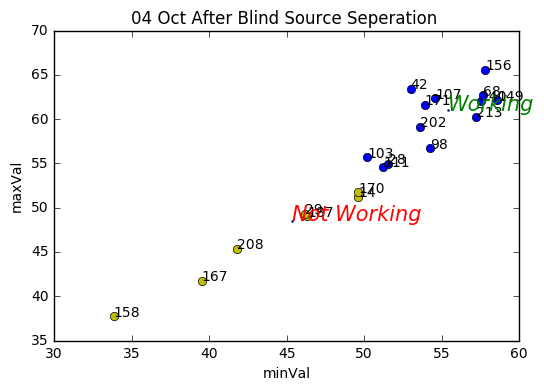

In [31]:
from sklearn.decomposition import FastICA # import FastICA


#selecting  components and perform ICA
ica = FastICA(n_components=3, whiten=True)
temp = ica.fit_transform(dataArray)
unmixingM=  ica.inverse_transform(temp)


#filenameArray=np.array([]).reshape(0,1)
minVal= np.array([]).reshape(0,1)
maxVal= np.array([]).reshape(0,1)

for i in xrange(len(unmixingM)):
    recon = unmixingM[i]
    recon = np.abs(recon)
    recon = recon.reshape(m,n)

    for val in range(4,5):
        minVal = np.append(minVal, np.amin(recon[val]))
        maxVal = np.append(maxVal, np.amax(recon[val]))


#merge data into one array
data = np.array([minVal,maxVal]).T

#Determine the cluster means with 3 clusters
centroids,_ = kmeans(data,2)

#2 arrays which information on clusterdata
#vq assigns a code to observations, code can be related to the cluster
idx,_ = vq(data,centroids)
#Colors do not match with previous plots since initializaton of the clusters is 
#done randomly making the order in which the clusters get determined random
for i, txt in enumerate(filenameArray1):
    plt.annotate(txt, (minVal[i],maxVal[i]))
plot(data[idx==0,0],data[idx==0,1],'bo',
     data[idx==1,0],data[idx==1,1],'yo') 
plot(centroids[:,0],centroids[:,1],'sb',markersize=1)


if centroids[0,0]<centroids[1,0]:
    plt.text(centroids[0,0],centroids[0,1], 'Not Working', style='italic', color='red', fontsize=15)  
    plt.text(centroids[1,0],centroids[1,1], 'Working', style='italic', color='green', fontsize=15)
if centroids[0,0]>centroids[1,0]:
    plt.text(centroids[1,0],centroids[1,1], 'Not Working', style='italic', color='red', fontsize=15) 
    plt.text(centroids[0,0],centroids[0,1], 'Working', style='italic', color='green', fontsize=15)
    
P.xlabel('minVal')
P.ylabel('maxVal')

#P.xlim([-14,2])
#P.ylim([-8,1])
#figtext(.05, .03, "The clustered data visualized of Pulse vs Tones.")
plt.title('04 Oct After Blind Source Seperation ')
show() 

## Dimensionality reduction before clustering alarm day data

From the above graph we can see that after ICA the data is fairly well clustered. So we do the same for the alarm day data to check the results.

107


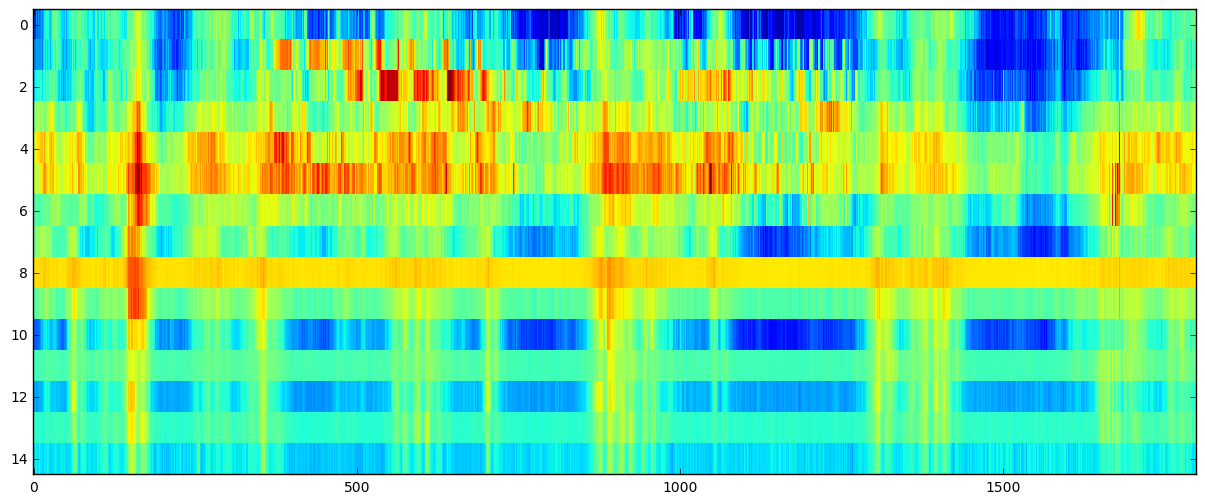

111


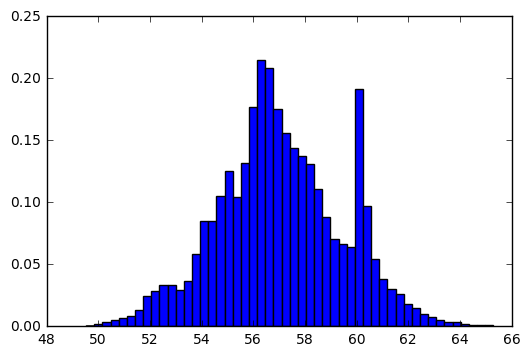

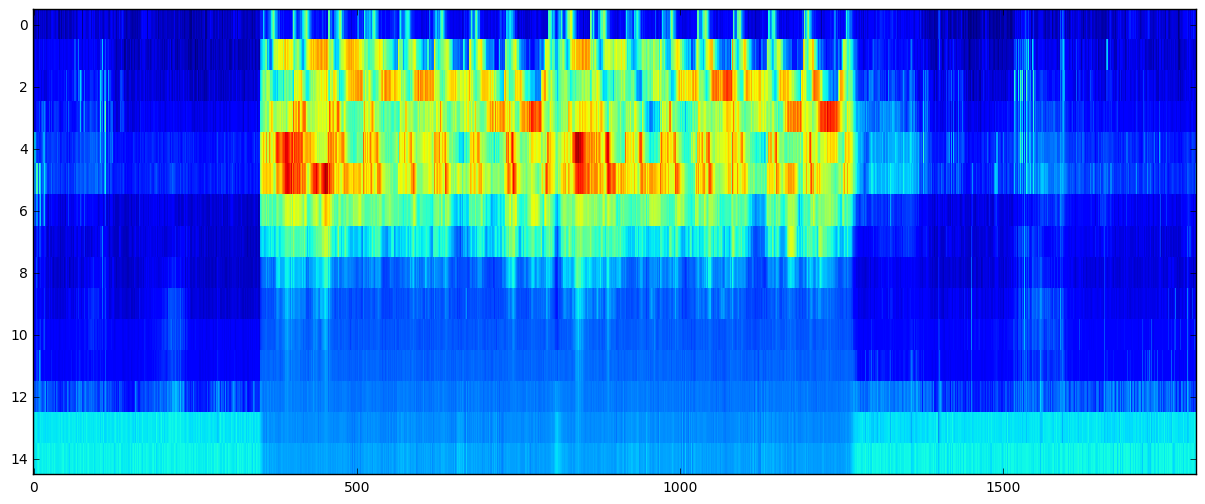

140


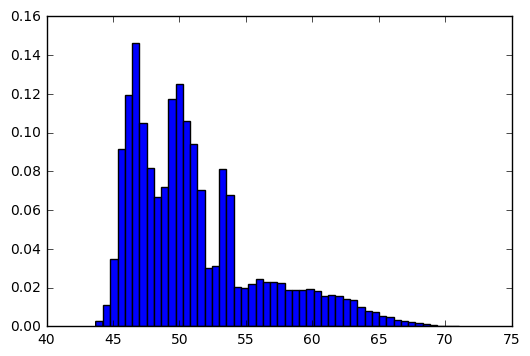

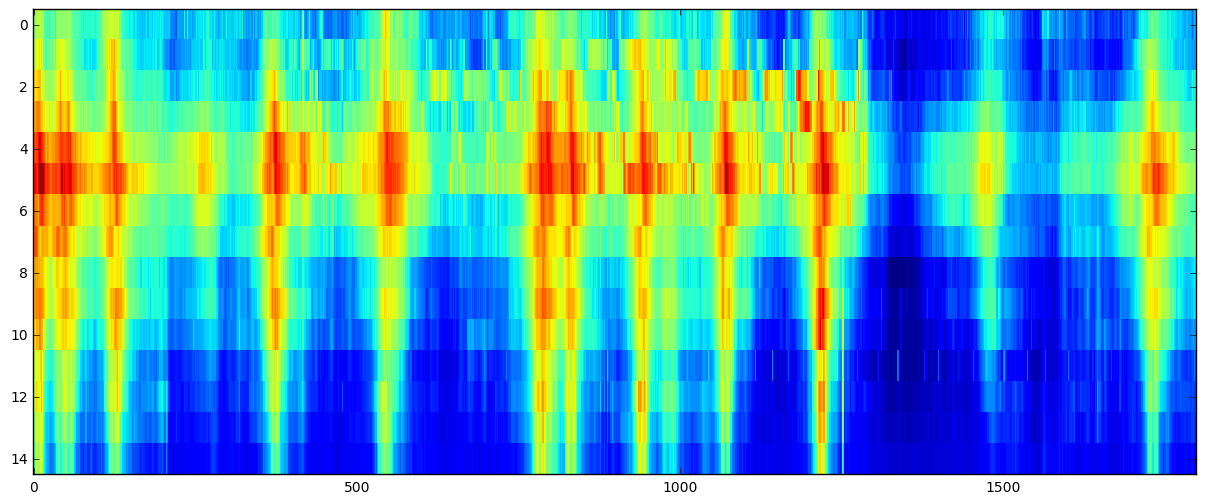

149


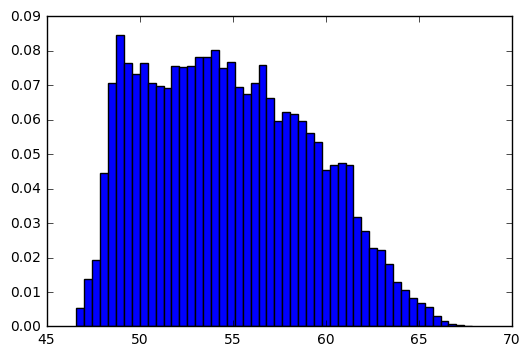

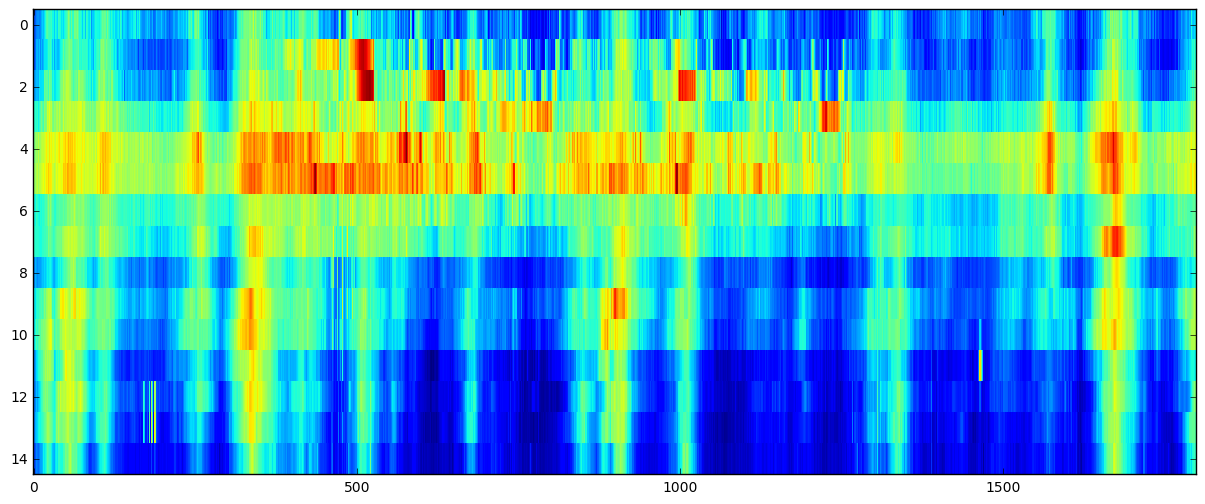

156


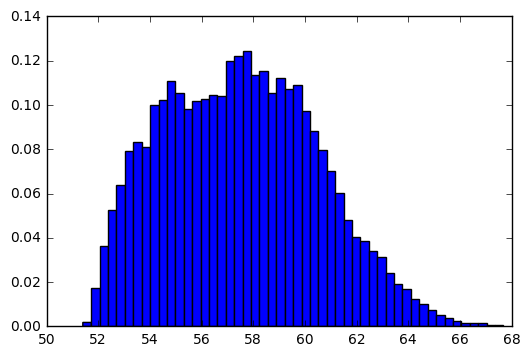

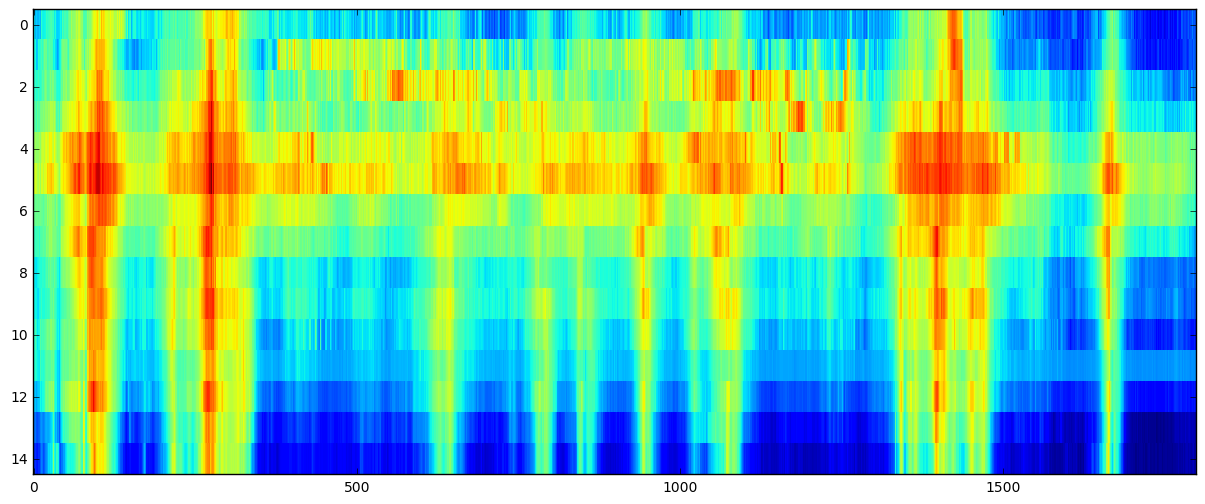

170


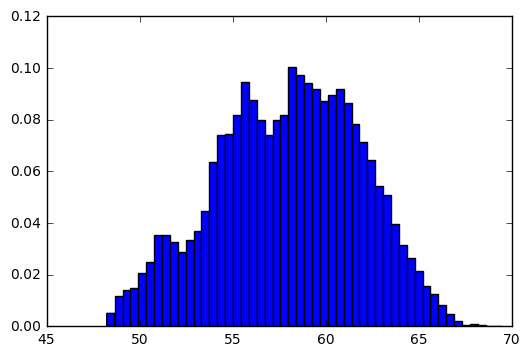

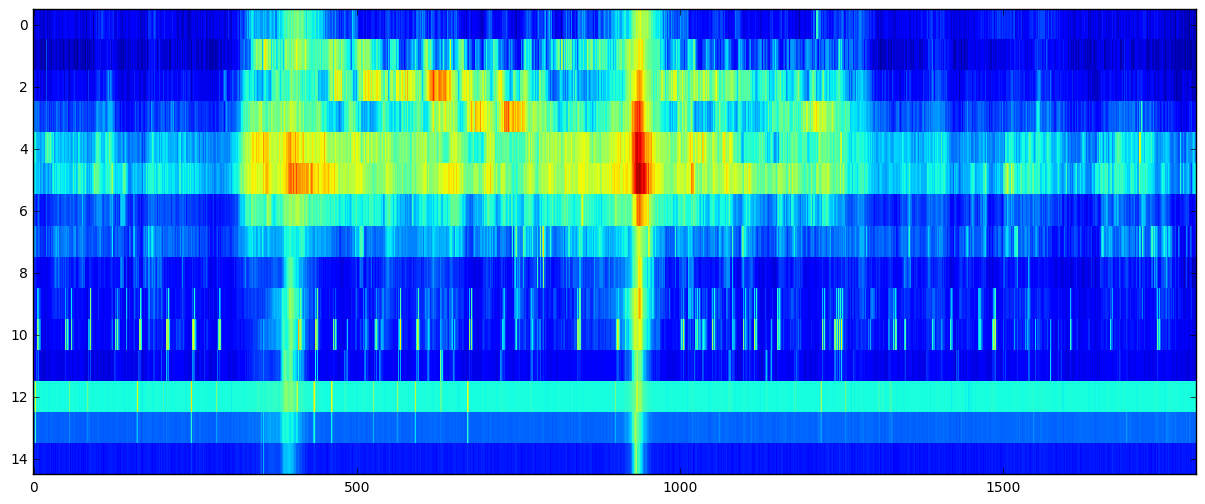

171


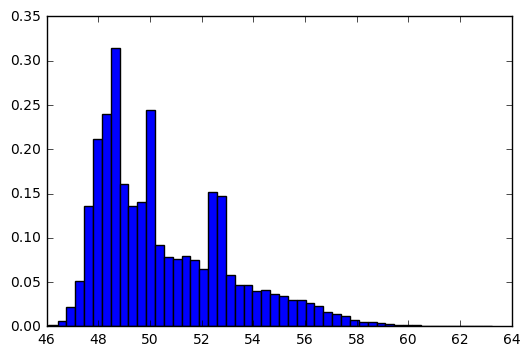

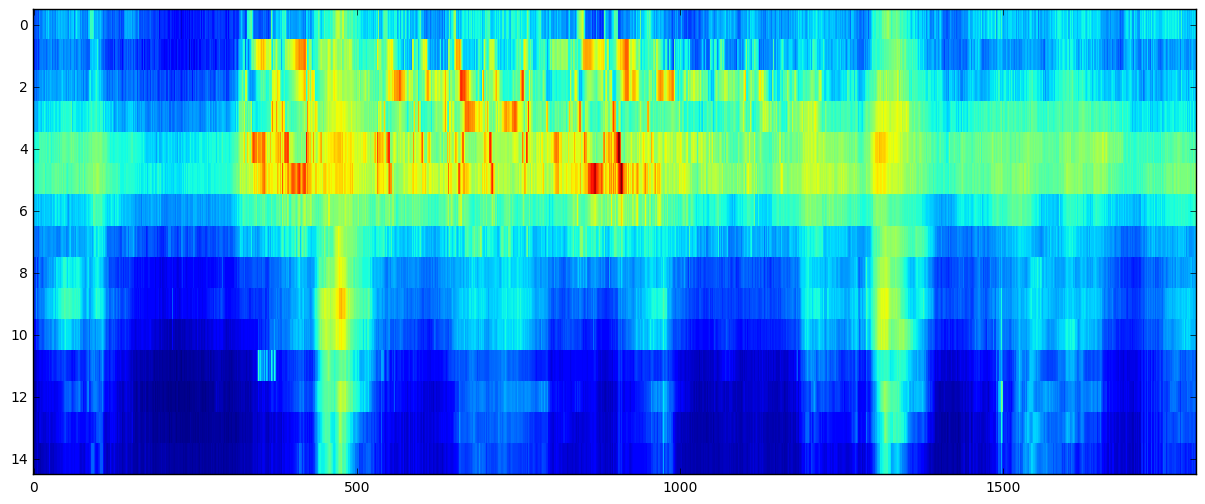

20


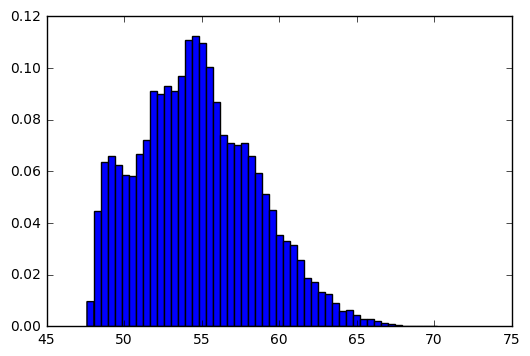

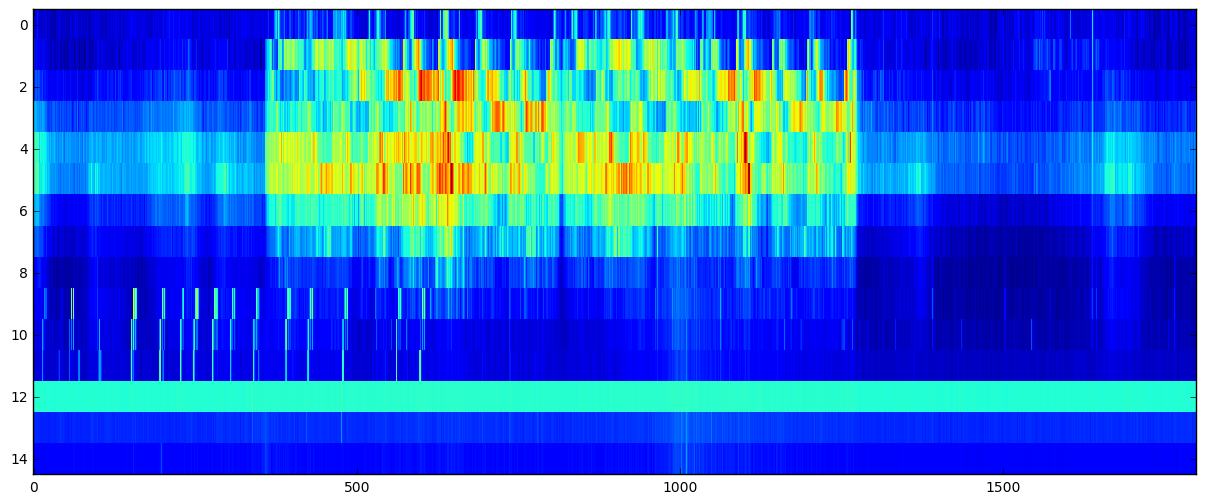

201


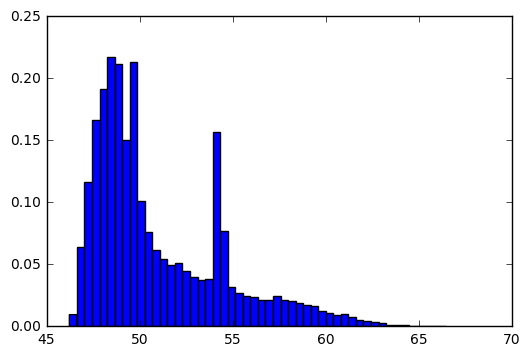

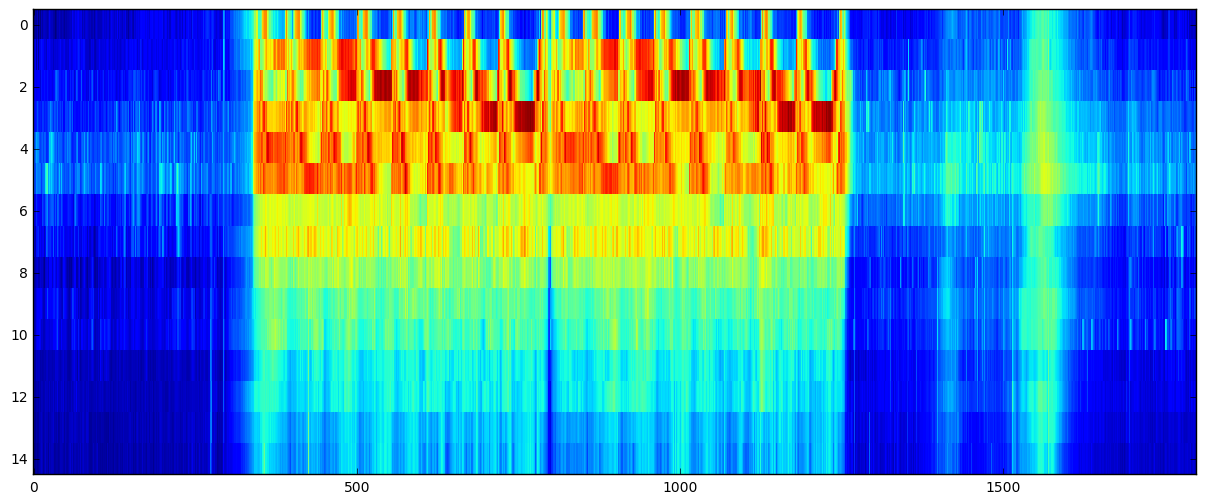

208


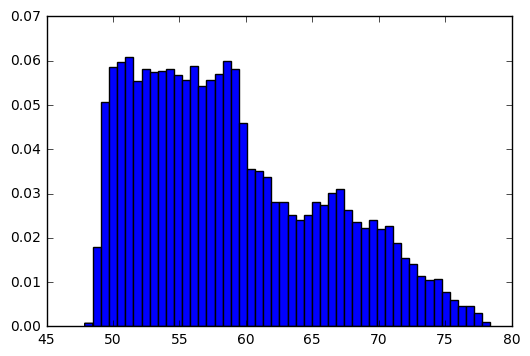

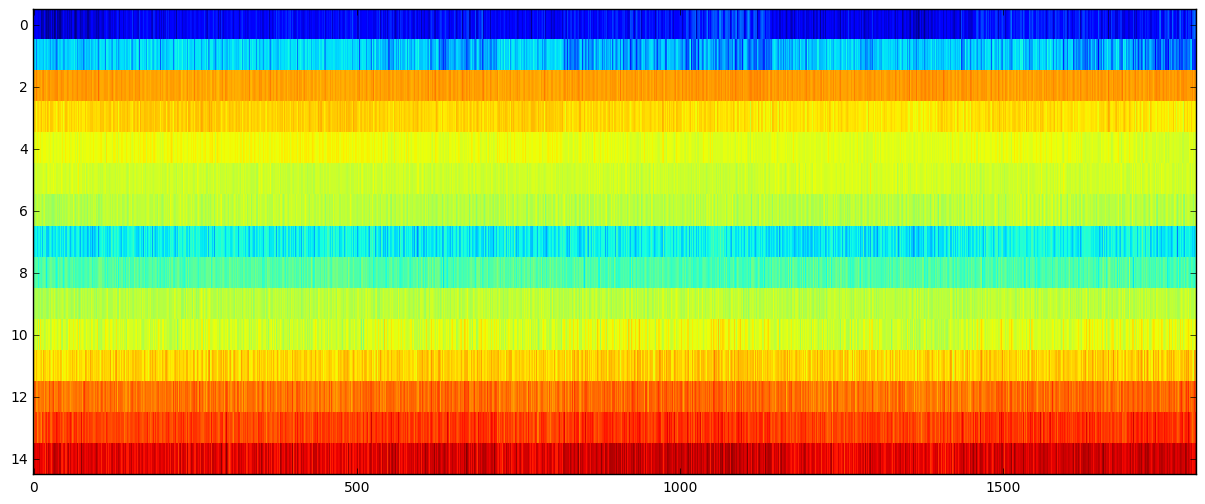

27


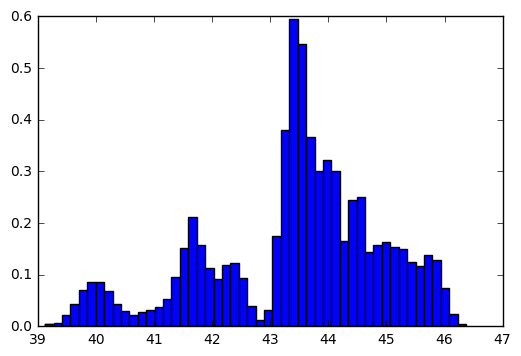

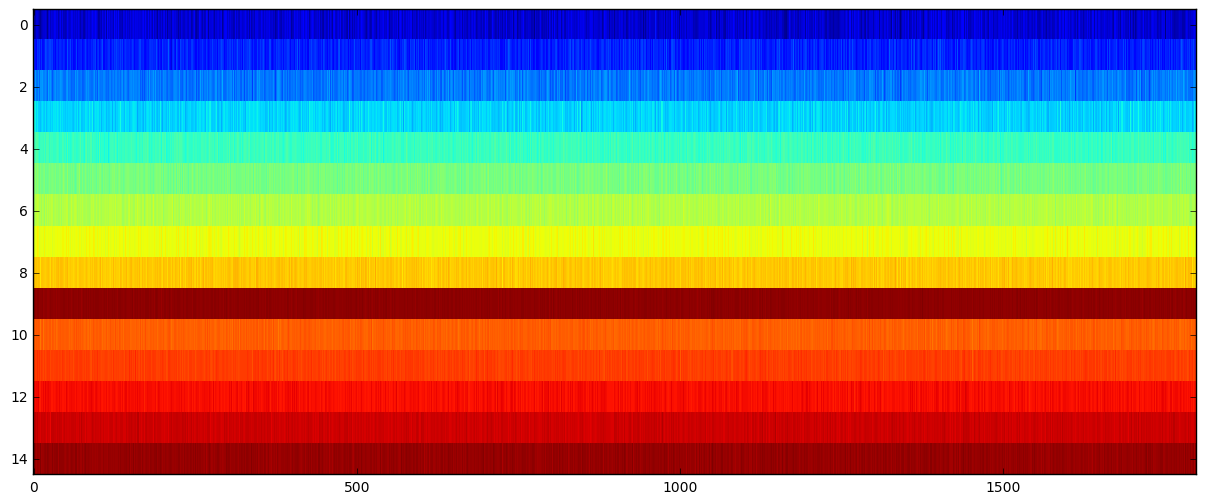

29


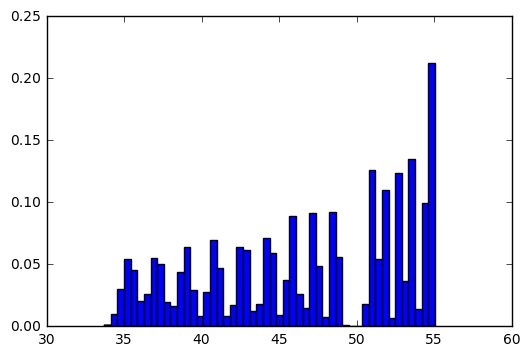

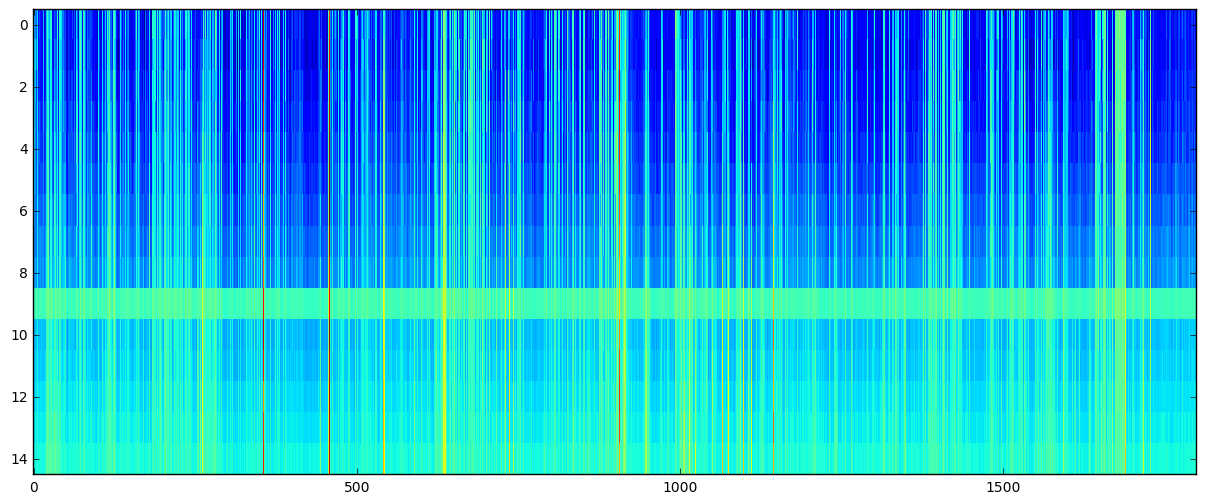

41


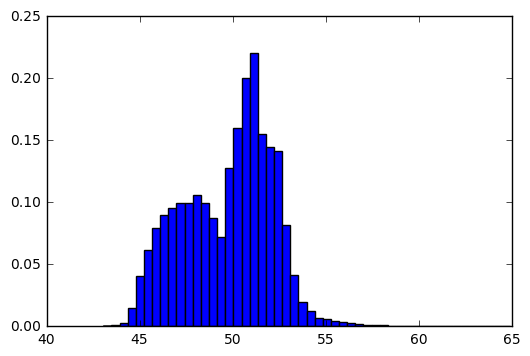

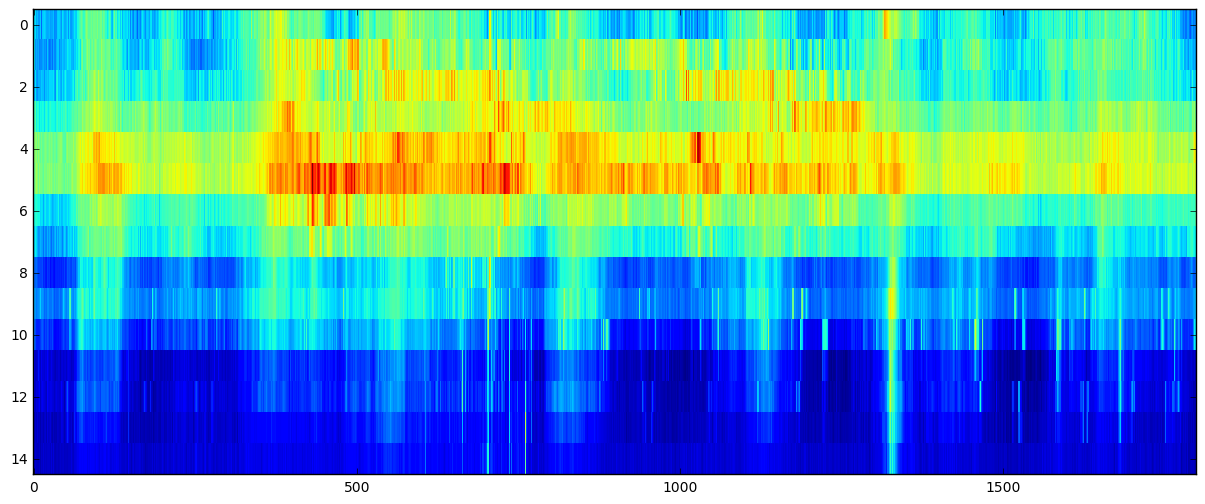

51


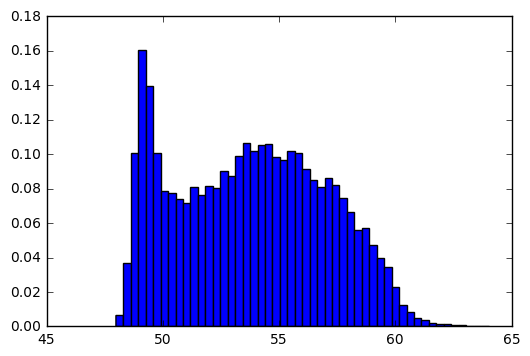

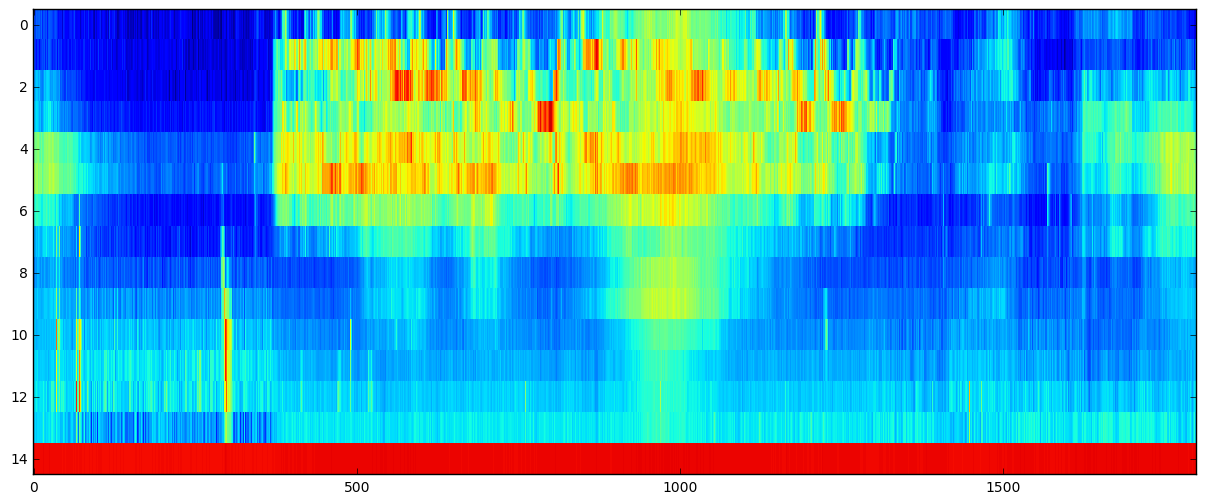

59


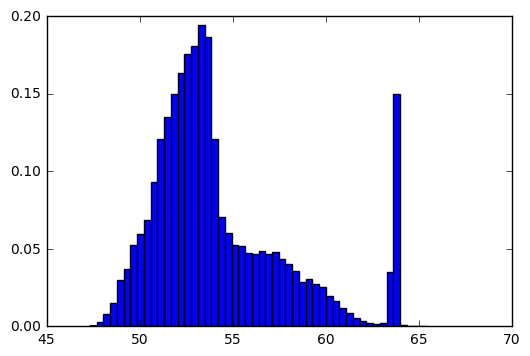

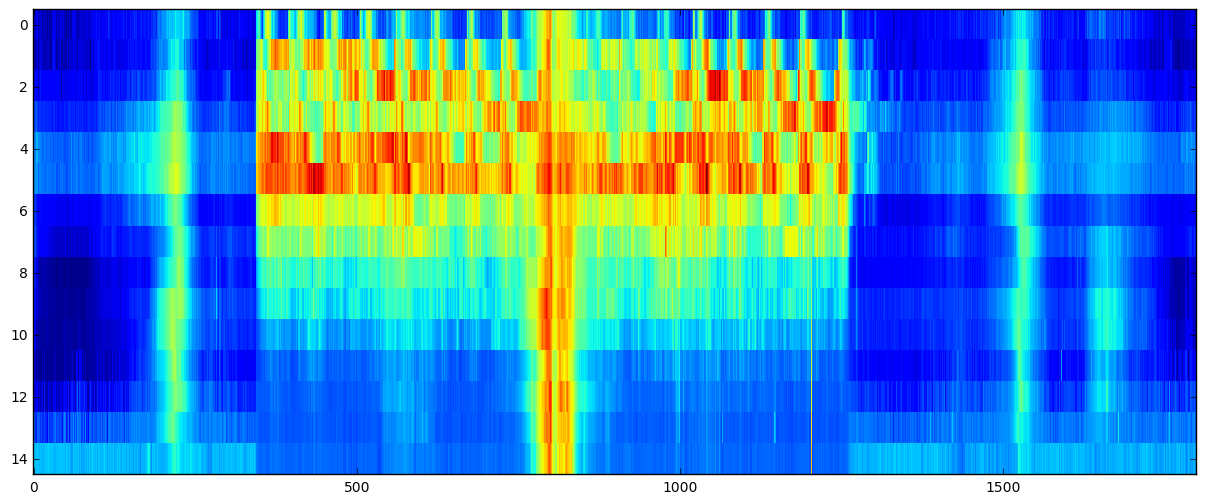

68


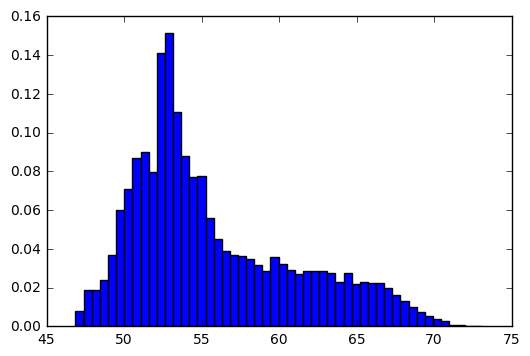

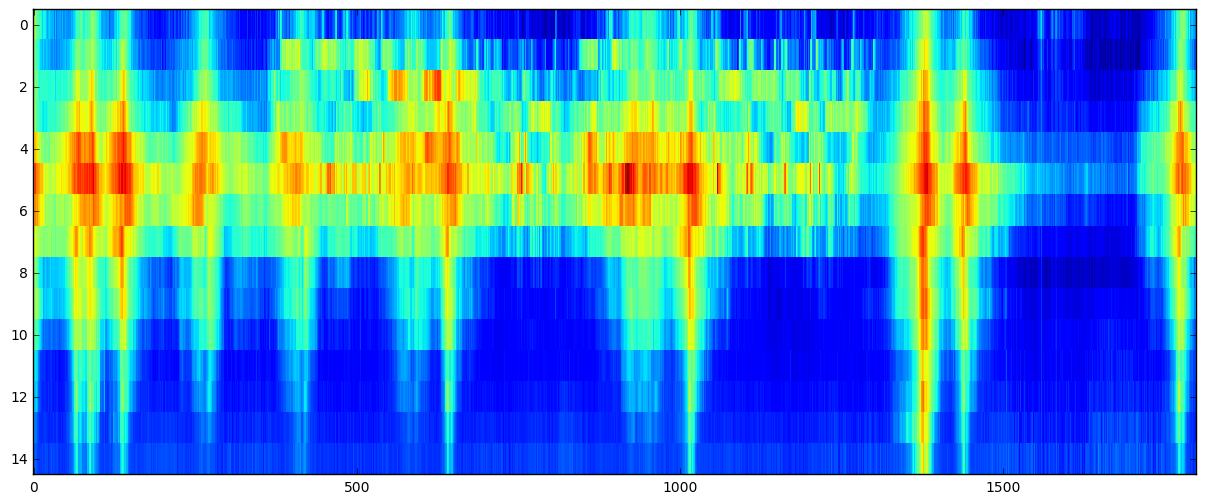

93


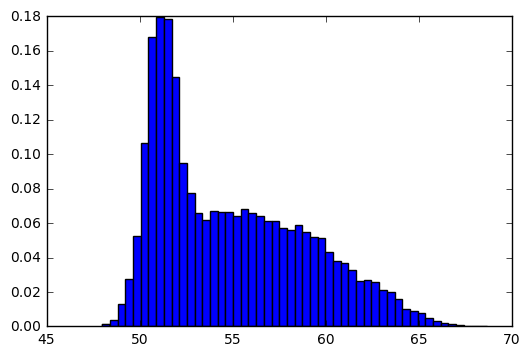

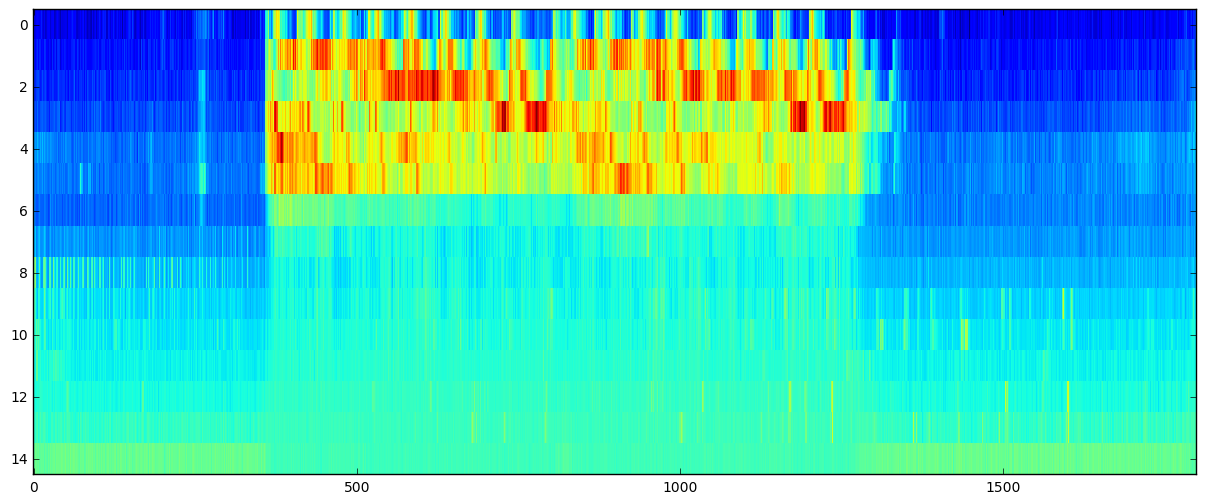

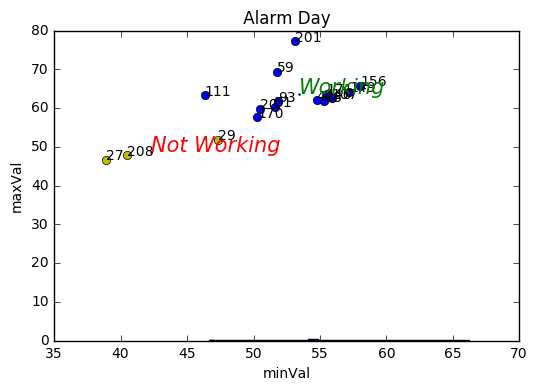

In [32]:
location = 'C:\\Users\\Danita\\Desktop\\sensorCityData\\03Oct\\GIT_cc14a7a227c856aee6e0b541b97a77aabb8d3307-2016-10-15-13-56\\ptne\\hdf5\\2016-10-15'

varforPCA=np.array([]).reshape(0,26970)
filenameArrayAlarm= np.array([]).reshape(0,1)
for filename in os.listdir(location):

    fullPath = os.path.join(location, filename)
    soundData = h5py.File(fullPath , 'r')
    energyVal = soundData.get('energy') 
    energyArray= np.array(energyVal)
    print filename[:-5]
    f=plt.figure(figsize=(15,6))
    ax = f.add_subplot(1,1,1)
    ax.imshow(energyArray[0:15], interpolation='nearest',aspect='auto')
    plt.show()
    m,n = energyArray[0:15].shape
    varforPCA=np.vstack([varforPCA, energyArray[0:15].flatten()])
    filenameArrayAlarm= np.append(filenameArrayAlarm,filename[:-5])
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1, 1)
    hist = ax1.hist(energyArray[0:15].flatten(),50, normed=1)
    

#convert the array to a matrix from an array format
dataArray = np.asmatrix(varforPCA)
#apply PCA on data 
#n_components was selected to be 3 as we expect at most background noise to account for one source, the siren as another and 
#traffic as another source
pca = skPCA(n_components=3)
X1= pca.fit_transform(dataArray)

reconstruct = pca.inverse_transform(X1)

for x in reconstruct:
    recon = x
    recon = np.abs(recon)
    recon = recon.reshape(m,n)
#    f=plt.figure(figsize=(16,6))
#    ax = f.add_subplot(1,1,1)
#    ax = f.add_subplot(1,1,1)
#    ax.imshow(recon, interpolation='nearest',aspect='auto')  
#    ax.matshow(recon, interpolation='nearest', cmap=cm.jet)
#    plt.show() 

#filenameArray=np.array([]).reshape(0,1)
minValAlarm= np.array([]).reshape(0,1)
maxValAlarm= np.array([]).reshape(0,1)

for i in xrange(len(reconstruct)):
    recon = reconstruct[i]
    recon = np.abs(recon)
    recon = recon.reshape(m,n)

    for val in range(4,5):
        minValAlarm = np.append(minValAlarm, np.amin(recon[val]))
        maxValAlarm = np.append(maxValAlarm, np.amax(recon[val]))
#        diff1 = maxValAlarm - minValAlarm
#        print diff1 ,filename[:-5]
#        avgofRow = np.average(energyArray[val])

#    print filename[:-5]
    
#    filenameArray= np.append(filenameArray, filename[:-5])
#print maxValAlarm, minValAlarm ,filenameArray


#merge data into one array
data = np.array([minValAlarm,maxValAlarm]).T

#Determine the cluster means with 3 clusters
centroids,_ = kmeans(data,2)

#2 arrays which information on clusterdata
#vq assigns a code to observations, code can be related to the cluster
idx,_ = vq(data,centroids)
#Colors do not match with previous plots since initializaton of the clusters is 
#done randomly making the order in which the clusters get determined random
for i, txt in enumerate(filenameArrayAlarm):
    plt.annotate(txt, (minValAlarm[i],maxValAlarm[i]))
plot(data[idx==0,0],data[idx==0,1],'bo',
     data[idx==1,0],data[idx==1,1],'yo') 
plot(centroids[:,0],centroids[:,1],'sb',markersize=1)


if centroids[0,0]<centroids[1,0]:
    plt.text(centroids[0,0],centroids[0,1], 'Not Working', style='italic', color='red', fontsize=15)  
    plt.text(centroids[1,0],centroids[1,1], 'Working', style='italic', color='green', fontsize=15)
if centroids[0,0]>centroids[1,0]:
    plt.text(centroids[1,0],centroids[1,1], 'Not Working', style='italic', color='red', fontsize=15) 
    plt.text(centroids[0,0],centroids[0,1], 'Working', style='italic', color='green', fontsize=15)
    
P.xlabel('minVal')
P.ylabel('maxVal')

#P.xlim([-14,2])
#P.ylim([-8,1])
#figtext(.05, .03, "The clustered data visualized of Pulse vs Tones.")
plt.title(' Alarm Day ')
show()

## Perform ICA on data
 

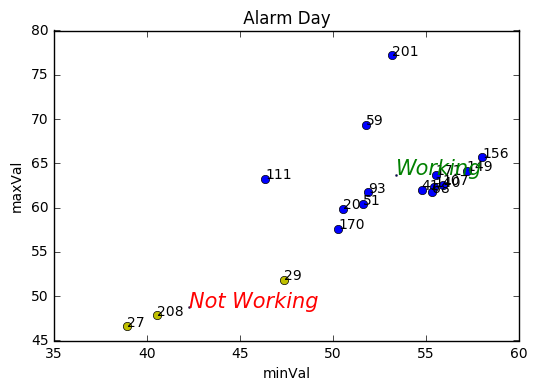

In [33]:
from sklearn.decomposition import FastICA # import FastICA


#selecting  components and perform ICA
ica = FastICA(n_components=3, whiten=True)
temp = ica.fit_transform(varforPCA)
unmixingM=  ica.inverse_transform(temp)


#filenameArray=np.array([]).reshape(0,1)
minValAlarm= np.array([]).reshape(0,1)
maxValAlarm= np.array([]).reshape(0,1)

for i in xrange(len(unmixingM)):
    recon = unmixingM[i]
    recon = np.abs(recon)
    recon = recon.reshape(m,n)

    for val in range(4,5):
        minValAlarm = np.append(minValAlarm, np.amin(recon[val]))
        maxValAlarm = np.append(maxValAlarm, np.amax(recon[val]))
#        diff1 = maxValAlarm - minValAlarm
#        print diff1 ,filename[:-5]
#        avgofRow = np.average(energyArray[val])

#    print filename[:-5]
    
#    filenameArray= np.append(filenameArray, filename[:-5])
#print maxValAlarm, minValAlarm ,filenameArray


#merge data into one array
data = np.array([minValAlarm,maxValAlarm]).T

#Determine the cluster means with 3 clusters
centroids,_ = kmeans(data,2)

#2 arrays which information on clusterdata
#vq assigns a code to observations, code can be related to the cluster
idx,_ = vq(data,centroids)
#Colors do not match with previous plots since initializaton of the clusters is 
#done randomly making the order in which the clusters get determined random
for i, txt in enumerate(filenameArrayAlarm):
    plt.annotate(txt, (minValAlarm[i],maxValAlarm[i]))
plot(data[idx==0,0],data[idx==0,1],'bo',
     data[idx==1,0],data[idx==1,1],'yo') 
plot(centroids[:,0],centroids[:,1],'sb',markersize=1)


if centroids[0,0]<centroids[1,0]:
    plt.text(centroids[0,0],centroids[0,1], 'Not Working', style='italic', color='red', fontsize=15)  
    plt.text(centroids[1,0],centroids[1,1], 'Working', style='italic', color='green', fontsize=15)
if centroids[0,0]>centroids[1,0]:
    plt.text(centroids[1,0],centroids[1,1], 'Not Working', style='italic', color='red', fontsize=15) 
    plt.text(centroids[0,0],centroids[0,1], 'Working', style='italic', color='green', fontsize=15)
    
P.xlabel('minVal')
P.ylabel('maxVal')

#P.xlim([-14,2])
#P.ylim([-8,1])
#figtext(.05, .03, "The clustered data visualized of Pulse vs Tones.")
plt.title(' Alarm Day ')
show()    

After ICA the sensor 29, which was classified incorrectly initially has now been classified correctly.